1) Plot the Day_Total vs Trading Days

2) Find the Max Drawdown ??

3) Max Gaining Streak, Max loosing streak

4) Histogram of Profits & Losses vs Days of the Week

5) Histogram of SL_Hits & Target_Hits vs Days of the Week

6) Histogram of SL_Hits & Target_Hits vs DT (min)

7) Histogram of ALL Profitable & ALL Lossy trades vs DT (min)

8) Histogram of ALL Profitable & ALL Lossy trades vs Traded (buy) Price

--Add the number of Trades per day in the PnL_DF

--Histogram of SL_Hits & Target_Hits vs RSI (optional)

In [66]:
'''Importing Important libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
tradebook_data = pd.read_csv(r"D:\Bootcamp DS\Internship\trading work\tradebook_3min_SL30_Pr100_cond1.csv")

In [465]:
tradebook_data.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit
0,NIFTY22J2018200CE,2022-01-17 10:09:00,NaN,Fresh Buy at:,161.05,NaN,0,0
1,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0
2,NIFTY22J2018200CE,2022-01-17 11:54:00,NaN,Fresh Buy at:,170.85,NaN,0,0
3,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0
4,NIFTY22J2018200CE,2022-01-17 12:39:00,NaN,Fresh Buy at:,169.85,NaN,0,0


In [3]:
# Gain = 1 if 'Profit' is greater than 0 (positive), and 0 otherwise (negative). 

tradebook_data['Gain/loss'] = tradebook_data['Profit'].apply(lambda x: "Gain" if x > 0 else "Loss")
tradebook_data['Gain/loss'].unique()

array(['Loss', 'Gain'], dtype=object)

# tradebook_data.head()

In [468]:
tradebook_data["Descr"].value_counts()

Fresh Buy at:                        2111
Square-off Buy order@                1849
Day Square-off Buy order              189
Target Hit for Buy order               46
Stop Loss Triggered for Buy order      27
Name: Descr, dtype: int64

Except for Fresh Buy at, all others denote sell.

In [469]:
tradebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Instr        4222 non-null   object 
 1   Date         4222 non-null   object 
 2   interval     0 non-null      float64
 3   Descr        4222 non-null   object 
 4   Trade_Price  4222 non-null   float64
 5   Profit       2111 non-null   float64
 6   Target_Hit   4222 non-null   int64  
 7   SL_Hit       4222 non-null   int64  
 8   Gain/loss    4222 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 297.0+ KB


In [4]:
tradebook_data['Date'] = pd.to_datetime(tradebook_data['Date'])
tradebook_data["Day"] = tradebook_data["Date"].dt.day_name()

In [5]:
#Computing time difference between buying and selling of a trade.
tradebook_data['delta_time'] = datetime.utcfromtimestamp(0)

for i in range(1,len(tradebook_data['Date']),2):
    tradebook_data['delta_time'][i] = tradebook_data.iloc[i]['Date'] - tradebook_data.iloc[i-1]['Date']
tradebook_data.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time
0,NIFTY22J2018200CE,2022-01-17 10:09:00,NaN,Fresh Buy at:,161.05,NaN,0,0,Loss,Monday,1970-01-01 00:00:00
1,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00
2,NIFTY22J2018200CE,2022-01-17 11:54:00,NaN,Fresh Buy at:,170.85,NaN,0,0,Loss,Monday,1970-01-01 00:00:00
3,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00
4,NIFTY22J2018200CE,2022-01-17 12:39:00,NaN,Fresh Buy at:,169.85,NaN,0,0,Loss,Monday,1970-01-01 00:00:00


In [6]:
#Computing time difference between buying an dselling of a trade.
tradebook_data['Trade_Price_Buy']= tradebook_data['Trade_Price'].shift(1)

In [7]:
tradebook_data.head(5)

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy
0,NIFTY22J2018200CE,2022-01-17 10:09:00,NaN,Fresh Buy at:,161.05,NaN,0,0,Loss,Monday,1970-01-01 00:00:00,NaN
1,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05
2,NIFTY22J2018200CE,2022-01-17 11:54:00,NaN,Fresh Buy at:,170.85,NaN,0,0,Loss,Monday,1970-01-01 00:00:00,161.75
3,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85
4,NIFTY22J2018200CE,2022-01-17 12:39:00,NaN,Fresh Buy at:,169.85,NaN,0,0,Loss,Monday,1970-01-01 00:00:00,164.70


In [8]:
#Data containing only sell details.
tradebook_data['Profit']=tradebook_data['Profit'].fillna(0)

In [9]:
tradebook_data2 = tradebook_data.loc[(tradebook_data['Profit']!=0)]

In [10]:
tradebook_data2['delta_time'] = pd.to_timedelta(tradebook_data2['delta_time'])

In [11]:
tradebook_data2['delta_min'] = tradebook_data2['delta_time'].dt.total_seconds() / 60

In [12]:
tradebook_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 1 to 4221
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Instr            2109 non-null   object         
 1   Date             2109 non-null   datetime64[ns] 
 2   interval         0 non-null      float64        
 3   Descr            2109 non-null   object         
 4   Trade_Price      2109 non-null   float64        
 5   Profit           2109 non-null   float64        
 6   Target_Hit       2109 non-null   int64          
 7   SL_Hit           2109 non-null   int64          
 8   Gain/loss        2109 non-null   object         
 9   Day              2109 non-null   object         
 10  delta_time       2109 non-null   timedelta64[ns]
 11  Trade_Price_Buy  2109 non-null   float64        
 12  delta_min        2109 non-null   float64        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4), timedelta64[ns](1)
memo

In [13]:
tradebook_data2.reset_index(inplace=True,drop=True)
tradebook_data2

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min
0,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0
1,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0
2,NIFTY22J2018200CE,2022-01-17 12:51:00,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0
3,NIFTY22J2018200CE,2022-01-17 13:24:00,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0
4,NIFTY22J2018200CE,2022-01-17 15:27:00,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,NIFTY22J0518300PE,2022-12-30 12:37:00,NaN,Square-off Buy order@,148.90,17473.0,0,0,Gain,Friday,0 days 01:45:00,136.85,105.0
2105,NIFTY22J0518300PE,2022-12-30 13:31:00,NaN,Square-off Buy order@,152.90,-14100.0,0,0,Loss,Friday,0 days 00:27:00,164.65,27.0
2106,NIFTY22J0518300PE,2022-12-30 14:16:00,NaN,Square-off Buy order@,158.30,-23980.0,0,0,Loss,Friday,0 days 00:24:00,180.10,24.0
2107,NIFTY22J0518300PE,2022-12-30 14:49:00,NaN,Square-off Buy order@,159.30,-18040.0,0,0,Loss,Friday,0 days 00:12:00,175.70,12.0


In [14]:
tradebook_data2['cumulative_Profit'] = tradebook_data2['Profit'].cumsum()

In [15]:
tradebook_data2.head(25)

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit
0,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0
1,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0
2,NIFTY22J2018200CE,2022-01-17 12:51:00,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0
3,NIFTY22J2018200CE,2022-01-17 13:24:00,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0
4,NIFTY22J2018200CE,2022-01-17 15:27:00,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0
5,NIFTY22J2018400PE,2022-01-17 10:03:00,NaN,Square-off Buy order@,184.75,-1312.0,0,0,Loss,Monday,0 days 00:09:00,186.00,9.0,-352.0
6,NIFTY22J2018400PE,2022-01-17 11:45:00,NaN,Square-off Buy order@,161.50,-5460.0,0,0,Loss,Monday,0 days 00:09:00,166.05,9.0,-5812.0
7,NIFTY22J2018400PE,2022-01-17 12:39:00,NaN,Square-off Buy order@,156.00,-6240.0,0,0,Loss,Monday,0 days 00:21:00,161.20,21.0,-12052.0
8,NIFTY22J2018400PE,2022-01-17 13:06:00,NaN,Square-off Buy order@,156.35,-6180.0,0,0,Loss,Monday,0 days 00:06:00,161.50,6.0,-18232.0
9,NIFTY22J2018400PE,2022-01-17 13:57:00,NaN,Square-off Buy order@,157.15,-4200.0,0,0,Loss,Monday,0 days 00:21:00,160.65,21.0,-22432.0


In [16]:
display(tradebook_data2.head())
display(tradebook_data.head())

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit
0,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0
1,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0
2,NIFTY22J2018200CE,2022-01-17 12:51:00,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0
3,NIFTY22J2018200CE,2022-01-17 13:24:00,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0
4,NIFTY22J2018200CE,2022-01-17 15:27:00,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0


,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy
0,NIFTY22J2018200CE,2022-01-17 10:09:00,NaN,Fresh Buy at:,161.05,0.0,0,0,Loss,Monday,1970-01-01 00:00:00,NaN
1,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05
2,NIFTY22J2018200CE,2022-01-17 11:54:00,NaN,Fresh Buy at:,170.85,0.0,0,0,Loss,Monday,1970-01-01 00:00:00,161.75
3,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85
4,NIFTY22J2018200CE,2022-01-17 12:39:00,NaN,Fresh Buy at:,169.85,0.0,0,0,Loss,Monday,1970-01-01 00:00:00,164.70


### Creating Pnl dataframe

In [17]:
import pandas as pd

# Create a pivot table
tradebook_data_pivot = tradebook_data.pivot_table(index=tradebook_data["Date"].dt.date, columns=tradebook_data['Instr'].str[-2:], values='Profit', aggfunc='sum')

# Reset the index to move the dates into a column
tradebook_data_pivot.reset_index(inplace=True)

# Rename the columns as desired
tradebook_data_pivot.columns = ['Date', 'CE', 'PE']

In [18]:
tradebook_data_pivot

,Date,CE,PE
0,2022-01-17,960.0,-23392.0
1,2022-01-18,28845.0,108248.0
2,2022-01-19,-105210.0,-2095.0
3,2022-01-20,19582.0,381513.0
4,2022-01-21,-11594.0,-67185.0
...,...,...,...
229,2022-12-26,-9320.0,-43596.0
230,2022-12-27,22183.0,-66592.0
231,2022-12-28,-55767.0,-49288.0
232,2022-12-29,49108.0,-39648.0


In [19]:
tradebook_data_pivot["day_total"] = tradebook_data_pivot["CE"] + tradebook_data_pivot["PE"]

In [20]:
tradebook_data_pivot.head()

,Date,CE,PE,day_total
0,2022-01-17,960.0,-23392.0,-22432.0
1,2022-01-18,28845.0,108248.0,137093.0
2,2022-01-19,-105210.0,-2095.0,-107305.0
3,2022-01-20,19582.0,381513.0,401095.0
4,2022-01-21,-11594.0,-67185.0,-78779.0


In [21]:
pnl_tradebook_day = tradebook_data_pivot.copy()

In [22]:
pnl_tradebook_day.insert(1, 'nifty_diff', 0)
pnl_tradebook_day.insert(2, 'Target_per', 100)
pnl_tradebook_day.insert(3, 'interval', "3 minutes")

In [23]:
#pnl_tradebook_day.insert(4, 'Periods', (3,14), True)

In [24]:
pnl_tradebook_day.head()

,Date,nifty_diff,Target_per,interval,CE,PE,day_total
0,2022-01-17,0,100,3 minutes,960.0,-23392.0,-22432.0
1,2022-01-18,0,100,3 minutes,28845.0,108248.0,137093.0
2,2022-01-19,0,100,3 minutes,-105210.0,-2095.0,-107305.0
3,2022-01-20,0,100,3 minutes,19582.0,381513.0,401095.0
4,2022-01-21,0,100,3 minutes,-11594.0,-67185.0,-78779.0


In [25]:
tradebook_data2['Date_time'] = pd.to_datetime(tradebook_data2['Date'])
tradebook_data2["Date"] = tradebook_data2['Date'].dt.date
tradebook_data2["Date"] = pd.to_datetime(tradebook_data2["Date"])

In [26]:
trade_counts = tradebook_data2.groupby(['Date']).size().reset_index(name='trade_count')

In [27]:
trade_counts["Date"] = pd.to_datetime(trade_counts["Date"])

In [28]:
tradebook_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Instr              2109 non-null   object         
 1   Date               2109 non-null   datetime64[ns] 
 2   interval           0 non-null      float64        
 3   Descr              2109 non-null   object         
 4   Trade_Price        2109 non-null   float64        
 5   Profit             2109 non-null   float64        
 6   Target_Hit         2109 non-null   int64          
 7   SL_Hit             2109 non-null   int64          
 8   Gain/loss          2109 non-null   object         
 9   Day                2109 non-null   object         
 10  delta_time         2109 non-null   timedelta64[ns]
 11  Trade_Price_Buy    2109 non-null   float64        
 12  delta_min          2109 non-null   float64        
 13  cumulative_Profit  2109 non-null   float64      

In [29]:
trade_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         234 non-null    datetime64[ns]
 1   trade_count  234 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


In [30]:
pnl_tradebook_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        234 non-null    object 
 1   nifty_diff  234 non-null    int64  
 2   Target_per  234 non-null    int64  
 3   interval    234 non-null    object 
 4   CE          233 non-null    float64
 5   PE          234 non-null    float64
 6   day_total   233 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 12.9+ KB


In [31]:
pnl_tradebook_day['Date'] = pd.to_datetime(pnl_tradebook_day['Date'])

In [32]:
trade_counts

,Date,trade_count
0,2022-01-17,10
1,2022-01-18,7
2,2022-01-19,9
3,2022-01-20,7
4,2022-01-21,9
...,...,...
229,2022-12-26,10
230,2022-12-27,8
231,2022-12-28,12
232,2022-12-29,9


In [33]:
tradebook_data2 = pd.merge(tradebook_data2, trade_counts, on = 'Date')

In [34]:
tradebook_data2.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10


In [35]:
pnl_tradebook_day = pd.merge(pnl_tradebook_day, trade_counts, on = 'Date')

In [36]:
pnl_tradebook_day["Day"] = pnl_tradebook_day["Date"].dt.day_name()

In [37]:
pnl_tradebook_day.head()

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day
0,2022-01-17,0,100,3 minutes,960.0,-23392.0,-22432.0,10,Monday
1,2022-01-18,0,100,3 minutes,28845.0,108248.0,137093.0,7,Tuesday
2,2022-01-19,0,100,3 minutes,-105210.0,-2095.0,-107305.0,9,Wednesday
3,2022-01-20,0,100,3 minutes,19582.0,381513.0,401095.0,7,Thursday
4,2022-01-21,0,100,3 minutes,-11594.0,-67185.0,-78779.0,9,Friday


In [38]:
pnl_tradebook_day['cumulative_day_total'] = pnl_tradebook_day['day_total'].cumsum()

In [39]:
pnl_tradebook_day['cumulative_trade_counts'] = pnl_tradebook_day['trade_count'].cumsum()

In [40]:
pnl_tradebook_day.head()

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day,cumulative_day_total,cumulative_trade_counts
0,2022-01-17,0,100,3 minutes,960.0,-23392.0,-22432.0,10,Monday,-22432.0,10
1,2022-01-18,0,100,3 minutes,28845.0,108248.0,137093.0,7,Tuesday,114661.0,17
2,2022-01-19,0,100,3 minutes,-105210.0,-2095.0,-107305.0,9,Wednesday,7356.0,26
3,2022-01-20,0,100,3 minutes,19582.0,381513.0,401095.0,7,Thursday,408451.0,33
4,2022-01-21,0,100,3 minutes,-11594.0,-67185.0,-78779.0,9,Friday,329672.0,42


### 1) Plot of day_total vs trading days

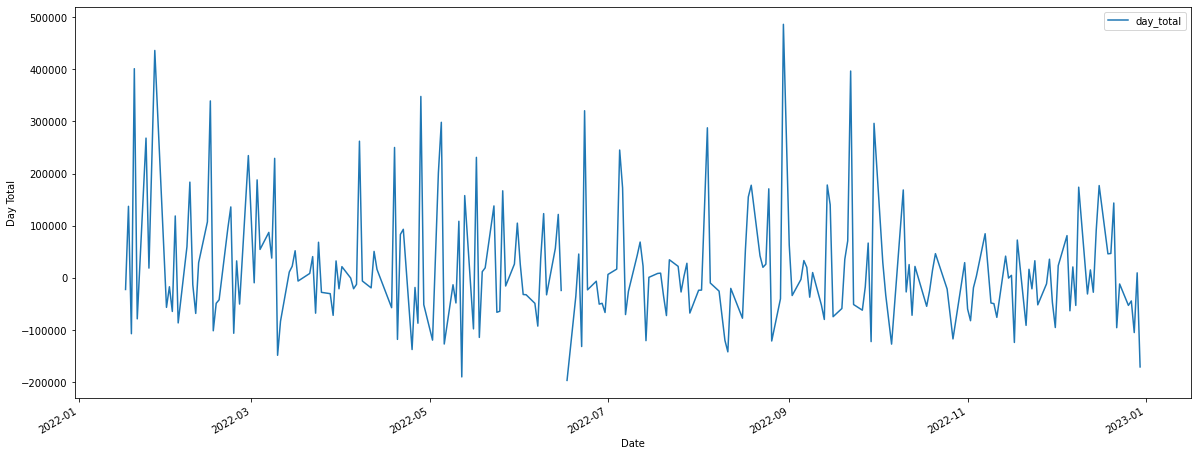

In [41]:
# Use the DataFrame's plot() method to create a line plot
pnl_tradebook_day.plot(x='Date', y='day_total', kind='line',figsize=(20,8), xlabel='Date', ylabel='Day Total')
plt.show()

### 2) To find maximum Drawdown?

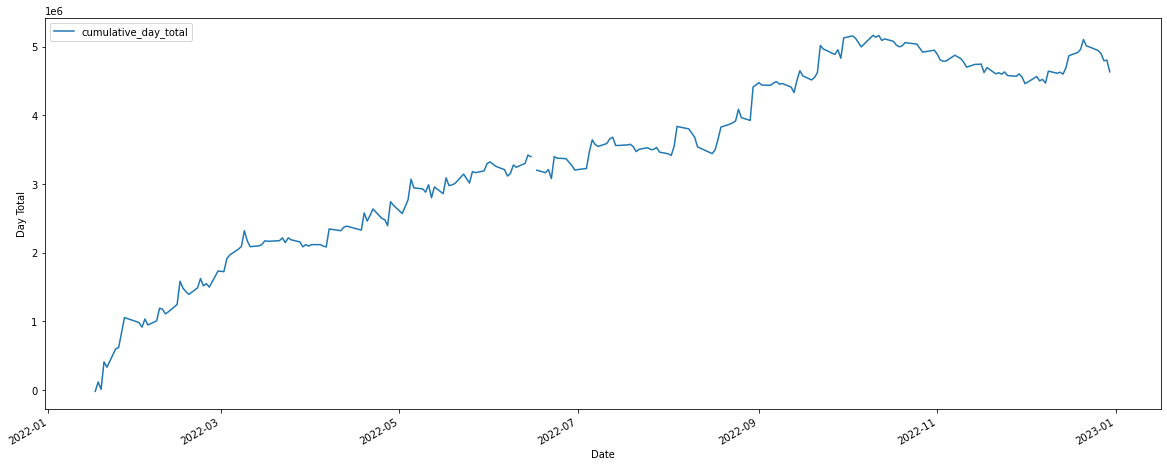

In [42]:
# Use the DataFrame's plot() method to create a line plot
pnl_tradebook_day.plot(x='Date', y='cumulative_day_total', kind='line',figsize=(20,8), xlabel='Date', ylabel='Day Total')
plt.show()

In [43]:
pnl_tradebook_day.head()

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day,cumulative_day_total,cumulative_trade_counts
0,2022-01-17,0,100,3 minutes,960.0,-23392.0,-22432.0,10,Monday,-22432.0,10
1,2022-01-18,0,100,3 minutes,28845.0,108248.0,137093.0,7,Tuesday,114661.0,17
2,2022-01-19,0,100,3 minutes,-105210.0,-2095.0,-107305.0,9,Wednesday,7356.0,26
3,2022-01-20,0,100,3 minutes,19582.0,381513.0,401095.0,7,Thursday,408451.0,33
4,2022-01-21,0,100,3 minutes,-11594.0,-67185.0,-78779.0,9,Friday,329672.0,42


In [44]:
import numpy as np

returns = pnl_tradebook_day["cumulative_day_total"]

def max_drawdown(returns):
    peak = returns[0]
    trough = returns[0]
    max_dd = 0
    for r in returns:
        if r > peak:
            peak = r
        dd = (peak - r) / peak
        if dd > max_dd:
            max_dd = dd
            trough = r
    return (max_dd*100, peak, trough)

max_drawdown(returns)  

(93.58456667916728, 5163958.0, 7356.0)

This code seems to be giving wrong results though the logic seems correct.

### 3) Find maximum gaining streak and maximum loosing streak

In [512]:

def max_gaining_streak(pnl_tradebook_day):
    current_streak = 0
    max_streak = 0
    for index, row in pnl_tradebook_day.iterrows():
        if row['day_total'] > 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

def max_losing_streak(pnl_tradebook_day):
    current_streak = 0
    max_streak = 0
    for index, row in pnl_tradebook_day.iterrows():
        if row['day_total'] < 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

print("Maximum gaining streak w.r.t days is", max_gaining_streak(pnl_tradebook_day))  
print("Maximum loosing streak w.r.t days is", max_losing_streak(pnl_tradebook_day))  


Maximum gaining streak w.r.t days is 7
Maximum loosing streak w.r.t days is 6


In [513]:
pnl_tradebook_day[142:151]

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day,cumulative_day_total,cumulative_trade_counts
142,2022-08-16,0,100,3 minutes,-52432.0,-25113.0,-77545.0,11,Tuesday,3441489.0,1310
143,2022-08-17,0,100,3 minutes,62767.0,-9803.0,52964.0,7,Wednesday,3494453.0,1317
144,2022-08-18,0,100,3 minutes,112482.0,42655.0,155137.0,5,Thursday,3649590.0,1322
145,2022-08-19,0,100,3 minutes,-26464.0,203990.0,177526.0,10,Friday,3827116.0,1332
146,2022-08-22,0,100,3 minutes,-31800.0,74015.0,42215.0,5,Monday,3869331.0,1337
147,2022-08-23,0,100,3 minutes,54340.0,-34300.0,20040.0,9,Tuesday,3889371.0,1346
148,2022-08-24,0,100,3 minutes,70579.0,-44467.0,26112.0,7,Wednesday,3915483.0,1353
149,2022-08-25,0,100,3 minutes,-10877.0,181512.0,170635.0,9,Thursday,4086118.0,1362
150,2022-08-26,0,100,3 minutes,-111280.0,-9960.0,-121240.0,11,Friday,3964878.0,1373


In [514]:
pnl_tradebook_day[136:144]

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day,cumulative_day_total,cumulative_trade_counts
136,2022-08-04,0,100,3 minutes,12661.0,275026.0,287687.0,11,Thursday,3837150.0,1249
137,2022-08-05,0,100,3 minutes,-30438.0,20368.0,-10070.0,10,Friday,3827080.0,1259
138,2022-08-08,0,100,3 minutes,23555.0,-49158.0,-25603.0,9,Monday,3801477.0,1268
139,2022-08-10,0,100,3 minutes,-27487.0,-92538.0,-120025.0,12,Wednesday,3681452.0,1280
140,2022-08-11,0,100,3 minutes,-58387.0,-83690.0,-142077.0,10,Thursday,3539375.0,1290
141,2022-08-12,0,100,3 minutes,5462.0,-25803.0,-20341.0,9,Friday,3519034.0,1299
142,2022-08-16,0,100,3 minutes,-52432.0,-25113.0,-77545.0,11,Tuesday,3441489.0,1310
143,2022-08-17,0,100,3 minutes,62767.0,-9803.0,52964.0,7,Wednesday,3494453.0,1317


Gaining streak is seen from 2022-08-17 to 2022-08-25, i.e., 7 consective days with positive day_total.

Loosing streak is seen from 2022-08-05 to 2022-08-16, i.e., 6 consective days with negative day_total.

### 4) Plot profit/loss vs Days

In [517]:

# Create separate dataframes for profit and loss
profit_data = pnl_tradebook_day[pnl_tradebook_day['day_total'] > 0]
profit_data["profit"] = profit_data["day_total"]
loss_data = pnl_tradebook_day[pnl_tradebook_day['day_total'] < 0]
loss_data['day_total'] = abs(loss_data['day_total'])
loss_data["loss"] = loss_data["day_total"]

# Group the data by day of the week and get the sum
profit_by_day = profit_data.groupby('Day')['day_total'].sum()
loss_by_day = loss_data.groupby('Day')['day_total'].sum()

In [518]:
profit_data['Day'] = pd.Categorical(profit_data['Day'], categories=days, ordered=True)
profit_data = profit_data.sort_values('Day')

loss_data['Day'] = pd.Categorical(loss_data['Day'], categories=days, ordered=True)
loss_data = loss_data.sort_values('Day')

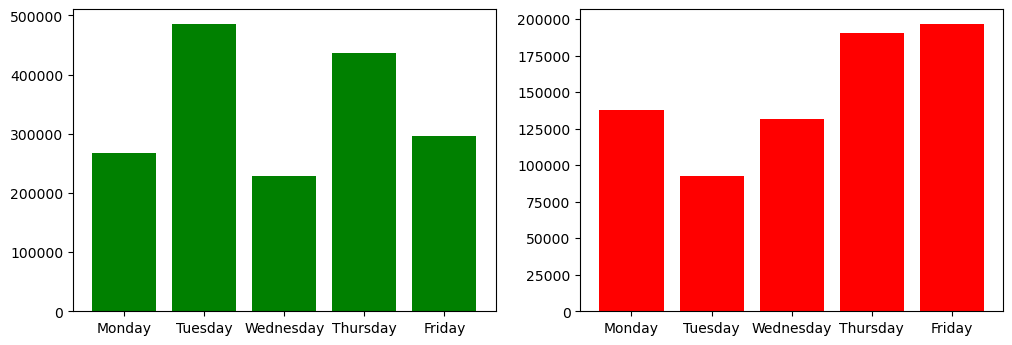

In [519]:
fig,axes=plt.subplots(figsize=(12,4),dpi=100) 
plt.subplot(1,2,1)
plt.bar(profit_data['Day'],profit_data['day_total'], label = 'Profit', color = "green")
plt.subplot(1,2,2)
plt.bar(loss_data['Day'], loss_data['day_total'], label = 'Loss', color = "red")
plt.show()

Maximum profit is obtained on Tuesday followed by Thursday and similarly maximum loss is obtained on Friday followed by Thursday.

### 5) Histogram of SL_Hits and Target_Hits vs week_days

In [520]:
tradebook_data.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy
0,NIFTY22J2018200CE,2022-01-17 10:09:00,NaN,Fresh Buy at:,161.05,0.0,0,0,Loss,Monday,1970-01-01 00:00:00,NaN
1,NIFTY22J2018200CE,2022-01-17 11:33:00,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05
2,NIFTY22J2018200CE,2022-01-17 11:54:00,NaN,Fresh Buy at:,170.85,0.0,0,0,Loss,Monday,1970-01-01 00:00:00,161.75
3,NIFTY22J2018200CE,2022-01-17 12:18:00,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85
4,NIFTY22J2018200CE,2022-01-17 12:39:00,NaN,Fresh Buy at:,169.85,0.0,0,0,Loss,Monday,1970-01-01 00:00:00,164.70


In [75]:
pnl_tradebook_day['Day'] = pd.Categorical(pnl_tradebook_day['Day'], categories=days, ordered=True)
pnl_tradebook_day = pnl_tradebook_day.sort_values('Day')

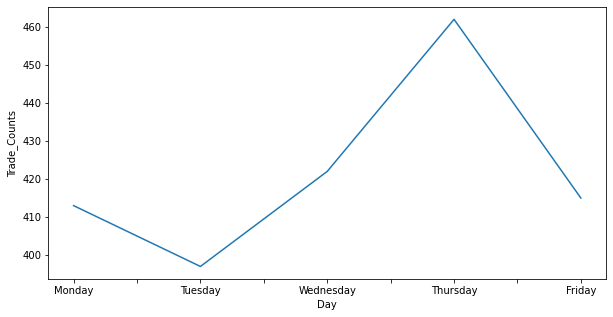

In [76]:
pnl_tradebook_day.groupby(pnl_tradebook_day['Day'])['trade_count'].sum().plot(kind='line',figsize=(10,5), xlabel='Day', ylabel='Trade_Counts')
plt.show()

Maximum number of trades are seen to happen on thursday.

In [523]:
tradebook_data2[57:63]

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
57,NIFTY22J2717300PE,2022-01-25,NaN,Square-off Buy order@,240.2,-19688.0,0,0,Loss,Tuesday,0 days 00:18:00,266.45,18.0,616110.0,2022-01-25 13:06:00,8
58,NIFTY22J2717000CE,2022-01-27,NaN,Stop Loss Triggered for Buy order,13.0,-57488.0,0,1,Loss,Thursday,0 days 00:06:00,18.25,6.0,558622.0,2022-01-27 12:42:00,8
59,NIFTY22J2717000CE,2022-01-27,NaN,Target Hit for Buy order,47.0,202635.0,1,0,Gain,Thursday,0 days 00:09:00,23.30,9.0,761257.0,2022-01-27 13:12:00,8
60,NIFTY22J2717000CE,2022-01-27,NaN,Target Hit for Buy order,85.0,199515.0,1,0,Gain,Thursday,0 days 00:30:00,42.55,30.0,960772.0,2022-01-27 13:51:00,8
61,NIFTY22J2717000CE,2022-01-27,NaN,Target Hit for Buy order,167.0,195872.0,1,0,Gain,Thursday,0 days 00:36:00,83.65,36.0,1156644.0,2022-01-27 14:36:00,8
62,NIFTY22J2717000CE,2022-01-27,NaN,Stop Loss Triggered for Buy order,117.0,-58362.0,0,1,Loss,Thursday,0 days 00:09:00,167.75,9.0,1098282.0,2022-01-27 14:54:00,8


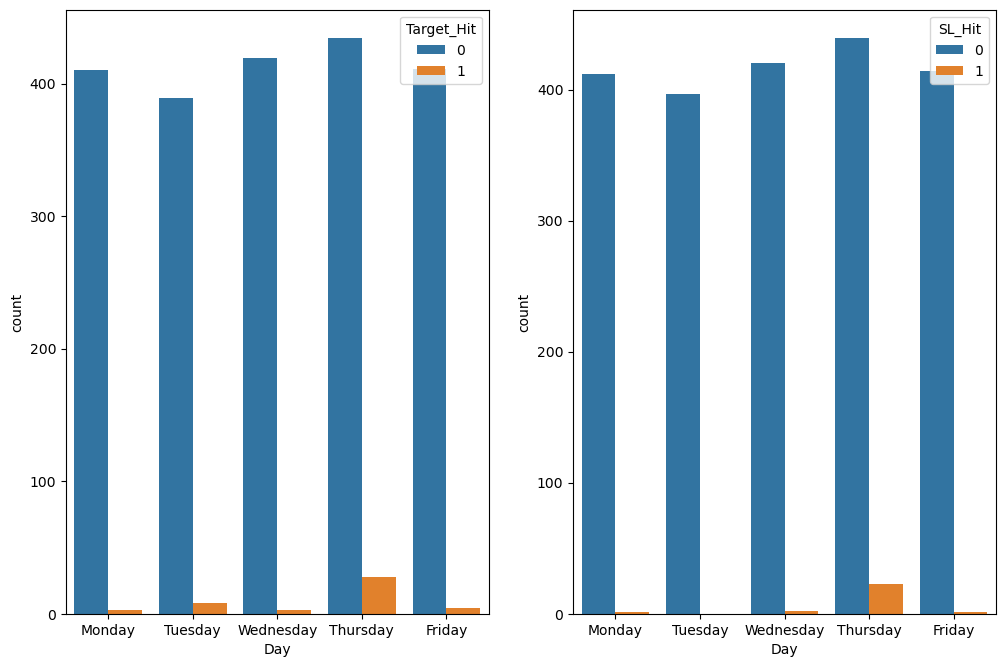

In [524]:
fig,axes=plt.subplots(figsize=(12,8),dpi=100) 
plt.subplot(1,2,1)
sns.countplot(data=tradebook_data2, x="Day", hue="Target_Hit")
plt.subplot(1,2,2)
sns.countplot(data=tradebook_data2, x="Day", hue="SL_Hit")
plt.show()

In [525]:
tradebook_data['Day'] = pd.Categorical(tradebook_data['Day'], categories=days, ordered=True)
tradebook_data = tradebook_data.sort_values('Day')

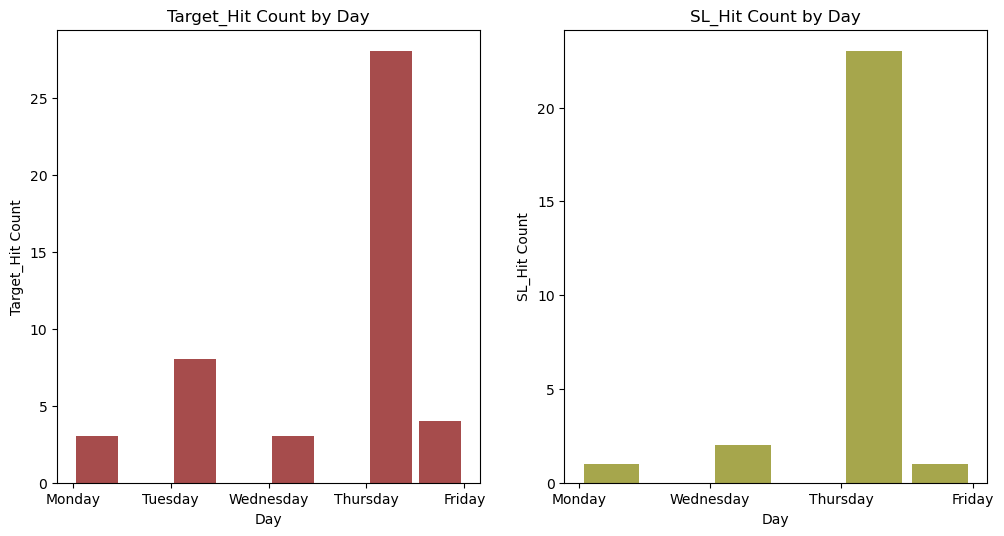

In [526]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=tradebook_data[tradebook_data['Target_Hit']==1]['Day'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Day')
plt.ylabel('Target_Hit Count')
plt.title('Target_Hit Count by Day')

plt.subplot(1,2,2)
plt.hist(x=tradebook_data[tradebook_data['SL_Hit']==1]['Day'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Day')
plt.ylabel('SL_Hit Count')
plt.title('SL_Hit Count by Day')
plt.show()

In [45]:
count_target_hits_on_thursday = tradebook_data2.loc[(tradebook_data2['Day'] == 'Thursday')& (tradebook_data2['Target_Hit']==1)]['Target_Hit'].count()
count_target_hits_on_thursday

28

In [528]:
count_sl_hits_on_thursday = tradebook_data2.loc[(tradebook_data2['Day'] == 'Thursday')& (tradebook_data2['SL_Hit']==1)]['SL_Hit'].count()
count_sl_hits_on_thursday

23

Mximum number of target_hits are seen on Thursday which is 28 and maximum count of SL_hit is also seen on Thursday which is 23.

### 6) SL_hits, Target_hits vs delta time

In [529]:
tradebook_data2.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10


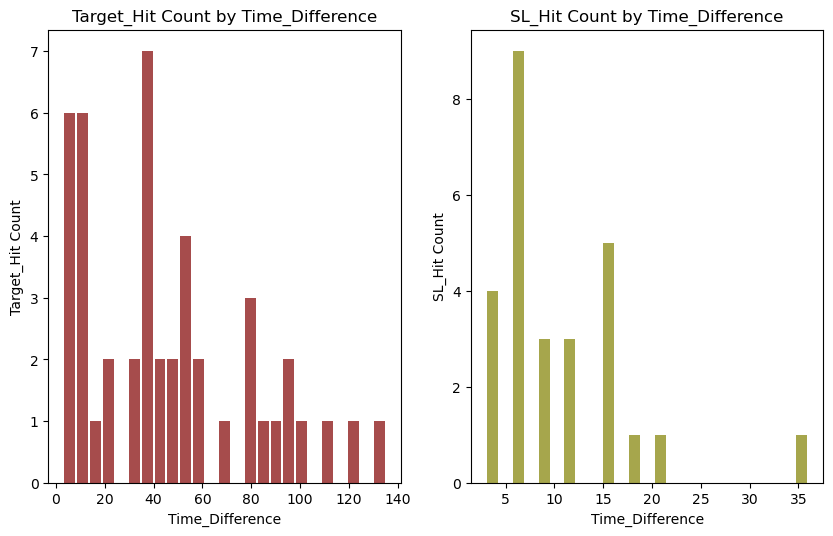

In [530]:
fig,axes=plt.subplots(figsize=(10,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=tradebook_data2[tradebook_data2['Target_Hit']==1]['delta_min'], bins=25, color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Target_Hit Count')
plt.title('Target_Hit Count by Time_Difference')

plt.subplot(1,2,2)
plt.hist(x=tradebook_data2[tradebook_data2['SL_Hit']==1]['delta_min'], bins=25, color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('SL_Hit Count')
plt.title('SL_Hit Count by Time_Difference')
plt.show()

Maximum number of Target hits is seen to happen with a time difference of 35-40mins.

Maximum number of SL hits is seen to happen with a time difference of 6-7mins.

In [531]:
display(tradebook_data2.head())

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10


In [532]:
tradebook_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 0 to 4221
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Instr            4222 non-null   object        
 1   Date             4222 non-null   datetime64[ns]
 2   interval         0 non-null      float64       
 3   Descr            4222 non-null   object        
 4   Trade_Price      4222 non-null   float64       
 5   Profit           4222 non-null   float64       
 6   Target_Hit       4222 non-null   int64         
 7   SL_Hit           4222 non-null   int64         
 8   Gain/loss        4222 non-null   object        
 9   Day              4222 non-null   category      
 10  delta_time       4222 non-null   object        
 11  Trade_Price_Buy  4221 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 400.3+ KB


All buy and sell trades are present in tradebook_data

In [533]:
tradebook_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Instr              2109 non-null   object         
 1   Date               2109 non-null   datetime64[ns] 
 2   interval           0 non-null      float64        
 3   Descr              2109 non-null   object         
 4   Trade_Price        2109 non-null   float64        
 5   Profit             2109 non-null   float64        
 6   Target_Hit         2109 non-null   int64          
 7   SL_Hit             2109 non-null   int64          
 8   Gain/loss          2109 non-null   object         
 9   Day                2109 non-null   object         
 10  delta_time         2109 non-null   timedelta64[ns]
 11  Trade_Price_Buy    2109 non-null   float64        
 12  delta_min          2109 non-null   float64        
 13  cumulative_Profit  2109 non-null   float64      

All buy trades are present in tradebook_data2 along with trade_buy_price

In [534]:
pnl_tradebook_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     234 non-null    datetime64[ns]
 1   nifty_diff               234 non-null    int64         
 2   Target_per               234 non-null    int64         
 3   interval                 234 non-null    object        
 4   CE                       233 non-null    float64       
 5   PE                       234 non-null    float64       
 6   day_total                233 non-null    float64       
 7   trade_count              234 non-null    int64         
 8   Day                      234 non-null    category      
 9   cumulative_day_total     233 non-null    float64       
 10  cumulative_trade_counts  234 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 20.7+ KB


All day_wise pnl trade is present in this dataframe.

### 7) Histogram of ALL Profitable & ALL Lossy trades vs DT (min)

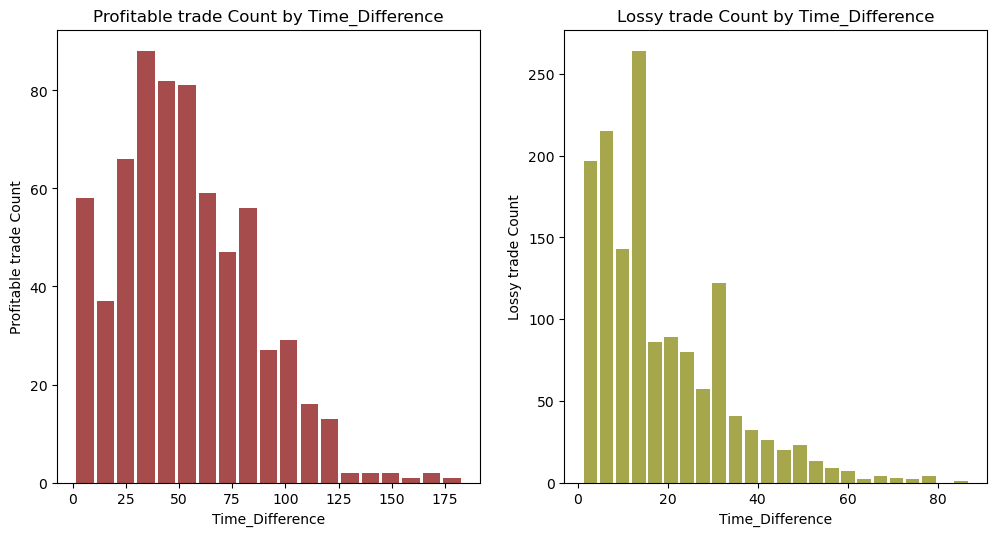

In [544]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=tradebook_data2[tradebook_data2['Gain/loss']=="Gain"]['delta_min'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Profitable trade Count')
plt.title('Profitable trade Count by Time_Difference')

plt.subplot(1,2,2)
plt.hist(x=tradebook_data2[tradebook_data2['Gain/loss']=="Loss"]['delta_min'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Lossy trade Count')
plt.title('Lossy trade Count by Time_Difference')
plt.show()

Maximum number of profittable trades are obtained within a time difference of 27-37mins.

Maximum number of Lossy trades are obtained within a time difference of 10-15mins.

In [545]:
pnl_tradebook_day.head()

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day,cumulative_day_total,cumulative_trade_counts
0,2022-01-17,0,100,3 minutes,960.0,-23392.0,-22432.0,10,Monday,-22432.0,10
190,2022-10-31,0,100,3 minutes,38277.0,-9246.0,29031.0,8,Monday,4947781.0,1724
83,2022-05-23,0,100,3 minutes,3735.0,134105.0,137840.0,4,Monday,3142658.0,790
78,2022-05-16,0,100,3 minutes,-64874.0,-33107.0,-97981.0,11,Monday,2857502.0,755
73,2022-05-09,0,100,3 minutes,46275.0,-59648.0,-13373.0,7,Monday,2927839.0,714


In [52]:
tradebook_data2

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,148.90,17473.0,0,0,Gain,Friday,0 days 01:45:00,136.85,105.0,5393577.0,2022-12-30 12:37:00,12
2105,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,152.90,-14100.0,0,0,Loss,Friday,0 days 00:27:00,164.65,27.0,5379477.0,2022-12-30 13:31:00,12
2106,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,158.30,-23980.0,0,0,Loss,Friday,0 days 00:24:00,180.10,24.0,5355497.0,2022-12-30 14:16:00,12
2107,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,159.30,-18040.0,0,0,Loss,Friday,0 days 00:12:00,175.70,12.0,5337457.0,2022-12-30 14:49:00,12


### 8) Histogram of ALL Profitable & ALL Lossy trades vs Traded (buy) Price

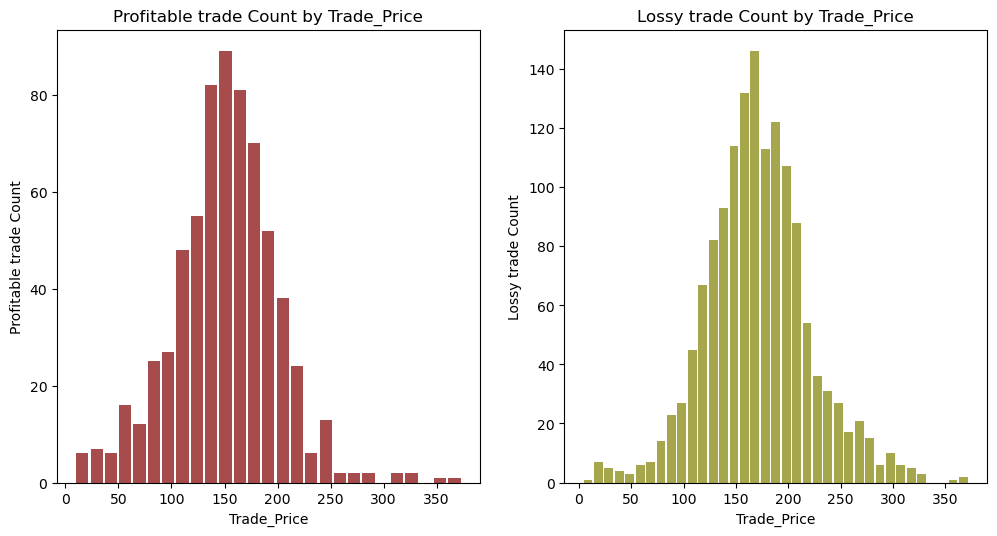

In [546]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=tradebook_data2[tradebook_data2['Gain/loss']=="Gain"]['Trade_Price_Buy'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Trade_Price')
plt.ylabel('Profitable trade Count')
plt.title('Profitable trade Count by Trade_Price')

plt.subplot(1,2,2)
plt.hist(x=tradebook_data2[tradebook_data2['Gain/loss']=="Loss"]['Trade_Price_Buy'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Trade_Price')
plt.ylabel('Lossy trade Count')
plt.title('Lossy trade Count by Trade_Price')
plt.show()

Maximum number of profittable trades are obtained for trade_buy_price between 145 to 155rs.

Mximum number of lossy trades are obtained for trade_buy_price being around 160 to 170rs.

## 9) Maximum gaining streak and loosing trade Counts

In [547]:
def max_gaining_streak(tradebook_data2):
    current_streak = 0
    max_streak = 0
    for index, row in tradebook_data2.iterrows():
        if row['Profit'] > 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

def max_losing_streak(tradebook_data2):
    current_streak = 0
    max_streak = 0
    for index, row in tradebook_data2.iterrows():
        if row['Profit'] < 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak


print("Maximum gaining streak w.r.t trades is", max_gaining_streak(tradebook_data2))  
print("Maximum loosing streak w.r.t trades is", max_losing_streak(tradebook_data2))  


Maximum gaining streak w.r.t trades is 6
Maximum loosing streak w.r.t trades is 18


In [548]:
pnl_tradebook_day.head()

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day,cumulative_day_total,cumulative_trade_counts
0,2022-01-17,0,100,3 minutes,960.0,-23392.0,-22432.0,10,Monday,-22432.0,10
190,2022-10-31,0,100,3 minutes,38277.0,-9246.0,29031.0,8,Monday,4947781.0,1724
83,2022-05-23,0,100,3 minutes,3735.0,134105.0,137840.0,4,Monday,3142658.0,790
78,2022-05-16,0,100,3 minutes,-64874.0,-33107.0,-97981.0,11,Monday,2857502.0,755
73,2022-05-09,0,100,3 minutes,46275.0,-59648.0,-13373.0,7,Monday,2927839.0,714


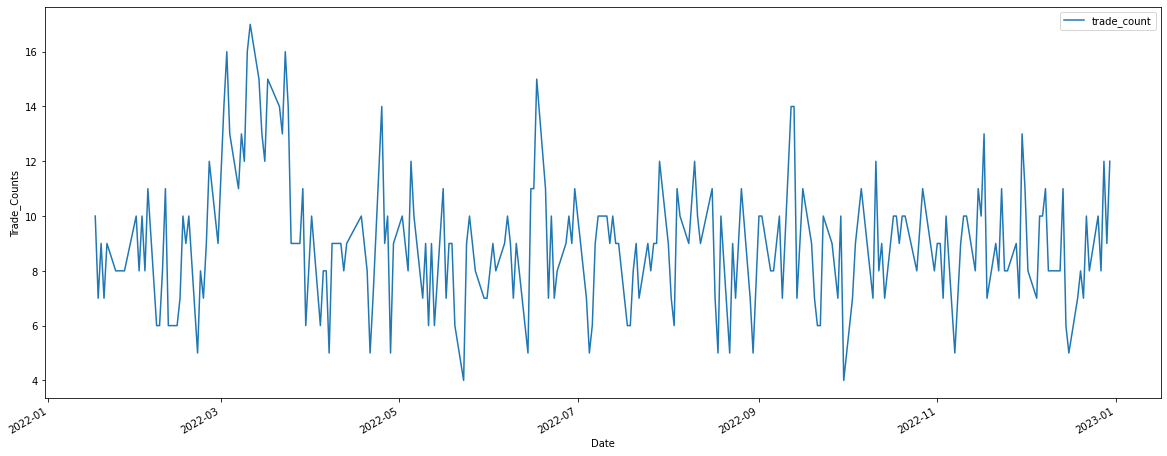

In [549]:
# Use the DataFrame's plot() method to create a line plot
pnl_tradebook_day.plot(x='Date', y='trade_count', kind='line',figsize=(20,8), xlabel='Date', ylabel='Trade_Counts')
plt.show()

In [550]:
pnl_tradebook_day[pnl_tradebook_day['trade_count']==pnl_tradebook_day['trade_count'].max()]

,Date,nifty_diff,Target_per,interval,CE,PE,day_total,trade_count,Day,cumulative_day_total,cumulative_trade_counts
36,2022-03-11,0,100,3 minutes,-45978.0,-37320.0,-83298.0,17,Friday,2085596.0,354


Mximum trade_count has obtained on Friday

In [551]:
def max_drawdown(returns):
    peak = returns[0]
    trough = returns[0]
    max_dd = 0
    for r in returns:
        if r > peak:
            peak = r
        dd = (peak - r) / peak
        if dd > max_dd:
            max_dd = dd
            trough = r
    return (max_dd*100, peak, trough)

returns = pnl_tradebook_day["trade_count"]
max_drawdown(returns)  

(76.47058823529412, 17, 4)

### All trdaes which has SL_hit within 10mins time-difference

In [59]:
trade_df_SL_hit_within_10mins = tradebook_data2[(tradebook_data2['delta_min']<10) & (tradebook_data2['SL_Hit'] ==1)]
trade_df_SL_hit_within_10mins.reset_index(inplace=True, drop=True)
trade_df_SL_hit_within_10mins

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2717000CE,2022-01-27,NaN,Stop Loss Triggered for Buy order,13.0,-57488.0,0,1,Loss,Thursday,0 days 00:06:00,18.25,6.0,558622.0,2022-01-27 12:42:00,8
1,NIFTY22J2717000CE,2022-01-27,NaN,Stop Loss Triggered for Buy order,117.0,-58362.0,0,1,Loss,Thursday,0 days 00:09:00,167.75,9.0,1098282.0,2022-01-27 14:54:00,8
2,NIFTY22F1017600PE,2022-02-10,NaN,Stop Loss Triggered for Buy order,23.0,-59170.0,0,1,Loss,Thursday,0 days 00:03:00,32.70,3.0,1166300.0,2022-02-10 13:23:00,11
3,NIFTY22F1017600PE,2022-02-10,NaN,Stop Loss Triggered for Buy order,11.0,-59288.0,0,1,Loss,Thursday,0 days 00:06:00,15.65,6.0,1107012.0,2022-02-10 14:59:00,11
4,NIFTY22M0517200CE,2022-04-29,NaN,Stop Loss Triggered for Buy order,131.0,-59220.0,0,1,Loss,Friday,0 days 00:03:00,187.40,3.0,2704505.0,2022-04-29 15:03:00,9
5,NIFTY22M0516800CE,2022-05-04,NaN,Stop Loss Triggered for Buy order,145.0,-58995.0,0,1,Loss,Wednesday,0 days 00:03:00,207.10,3.0,2489339.0,2022-05-04 14:05:00,8
6,NIFTY22M0516900PE,2022-05-04,NaN,Stop Loss Triggered for Buy order,80.0,-58480.0,0,1,Loss,Wednesday,0 days 00:06:00,114.40,6.0,2652811.0,2022-05-04 14:03:00,8
7,NIFTY22M0516800PE,2022-05-05,NaN,Stop Loss Triggered for Buy order,16.0,-62415.0,0,1,Loss,Thursday,0 days 00:06:00,23.30,6.0,2816666.0,2022-05-05 11:51:00,12
8,NIFTY22M0516800PE,2022-05-05,NaN,Stop Loss Triggered for Buy order,14.0,-59295.0,0,1,Loss,Thursday,0 days 00:09:00,19.90,9.0,2908538.0,2022-05-05 13:33:00,12
9,NIFTY22J0216500CE,2022-06-02,NaN,Stop Loss Triggered for Buy order,101.0,-57982.0,0,1,Loss,Thursday,0 days 00:06:00,143.95,6.0,3350122.0,2022-06-02 15:03:00,9


### All trdaes which has Target_hit within 10mins time-difference

In [553]:
trade_df_target_hit_within_10mins = tradebook_data2[(tradebook_data2['delta_min']<10) & (tradebook_data2['Target_Hit'] ==1)]
trade_df_target_hit_within_10mins.reset_index(inplace=True, drop=True)
trade_df_target_hit_within_10mins

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2717000CE,2022-01-27,NaN,Target Hit for Buy order,47.0,202635.0,1,0,Gain,Thursday,0 days 00:09:00,23.30,9.0,761257.0,2022-01-27 13:12:00,8
1,NIFTY22M0516800PE,2022-05-05,NaN,Target Hit for Buy order,28.0,196685.0,1,0,Gain,Thursday,0 days 00:06:00,14.10,6.0,2879081.0,2022-05-05 11:36:00,12
2,NIFTY22M0516800PE,2022-05-05,NaN,Target Hit for Buy order,36.0,194362.0,1,0,Gain,Thursday,0 days 00:06:00,18.25,6.0,2967833.0,2022-05-05 13:15:00,12
3,NIFTY22M0516800PE,2022-05-05,NaN,Target Hit for Buy order,83.0,200160.0,1,0,Gain,Thursday,0 days 00:09:00,41.30,9.0,3108698.0,2022-05-05 14:03:00,12
4,NIFTY22M2616000CE,2022-05-26,NaN,Target Hit for Buy order,45.0,199125.0,1,0,Gain,Thursday,0 days 00:09:00,22.50,9.0,3149415.0,2022-05-26 13:00:00,9
5,NIFTY22J1615500PE,2022-06-16,NaN,Target Hit for Buy order,18.0,190960.0,1,0,Gain,Thursday,0 days 00:03:00,9.20,3.0,3573584.0,2022-06-16 11:21:00,11
6,NIFTY22J1615500PE,2022-06-16,NaN,Target Hit for Buy order,53.0,197625.0,1,0,Gain,Thursday,0 days 00:03:00,26.65,3.0,3936262.0,2022-06-16 13:03:00,11
7,NIFTY22J2315400CE,2022-06-23,NaN,Target Hit for Buy order,164.0,196440.0,1,0,Gain,Thursday,0 days 00:09:00,82.15,9.0,3984765.0,2022-06-23 13:45:00,7
8,NIFTY22A0417400PE,2022-08-04,NaN,Target Hit for Buy order,61.0,200758.0,1,0,Gain,Thursday,0 days 00:03:00,30.35,3.0,4454759.0,2022-08-04 11:15:00,11
9,NIFTY22A0417400PE,2022-08-04,NaN,Target Hit for Buy order,121.0,199485.0,1,0,Gain,Thursday,0 days 00:03:00,60.55,3.0,4654244.0,2022-08-04 11:27:00,11


### Median time_diff for profittable/lossy trades.

In [554]:
tradebook_data2[tradebook_data2['Gain/loss'] == 'Gain']['delta_min'].median()

51.0

Median time_difference for trades being profittable is 51mins.

In [555]:
tradebook_data2[tradebook_data2['Gain/loss'] == 'Loss']['delta_min'].median()

15.0

Median time_difference for trades being lossy is 15mins.

### Analysis on All trades which has time_difference less tahn or equal to 15mins.

In [61]:
trade_td_lessorequal_15mins = tradebook_data2[tradebook_data2['delta_min']<=15]
trade_td_lessorequal_15mins.reset_index(inplace=True, drop=True)
trade_td_lessorequal_15mins.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10
2,NIFTY22J2018400PE,2022-01-17,NaN,Square-off Buy order@,184.75,-1312.0,0,0,Loss,Monday,0 days 00:09:00,186.00,9.0,-352.0,2022-01-17 10:03:00,10
3,NIFTY22J2018400PE,2022-01-17,NaN,Square-off Buy order@,161.50,-5460.0,0,0,Loss,Monday,0 days 00:09:00,166.05,9.0,-5812.0,2022-01-17 11:45:00,10
4,NIFTY22J2018400PE,2022-01-17,NaN,Square-off Buy order@,156.35,-6180.0,0,0,Loss,Monday,0 days 00:06:00,161.50,6.0,-18232.0,2022-01-17 13:06:00,10


In [557]:
trade_td_lessorequal_15mins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Instr              897 non-null    object         
 1   Date               897 non-null    datetime64[ns] 
 2   interval           0 non-null      float64        
 3   Descr              897 non-null    object         
 4   Trade_Price        897 non-null    float64        
 5   Profit             897 non-null    float64        
 6   Target_Hit         897 non-null    int64          
 7   SL_Hit             897 non-null    int64          
 8   Gain/loss          897 non-null    object         
 9   Day                897 non-null    object         
 10  delta_time         897 non-null    timedelta64[ns]
 11  Trade_Price_Buy    897 non-null    float64        
 12  delta_min          897 non-null    float64        
 13  cumulative_Profit  897 non-null    float64        

In [558]:
def max_gaining_streak(trade_td_lessorequal_15mins):
    current_streak = 0
    max_streak = 0
    for index, row in trade_td_lessorequal_15mins.iterrows():
        if row['Profit'] > 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

def max_losing_streak(trade_td_lessorequal_15mins):
    current_streak = 0
    max_streak = 0
    for index, row in trade_td_lessorequal_15mins.iterrows():
        if row['Profit'] < 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

print("Maximum gaining streak w.r.t trade is", max_gaining_streak(trade_td_lessorequal_15mins))  
print("Maximum loosing streak w.r.t trades is", max_losing_streak(trade_td_lessorequal_15mins))  


Maximum gaining streak w.r.t trade is 2
Maximum loosing streak w.r.t trades is 36


In [62]:
# Create separate dataframes for profit and loss
profit_data = trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Profit'] > 0]
#profit_data["Profit/Loss"] = profit_data["Profit"]
loss_data = trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Profit'] < 0]
loss_data['Loss'] = abs(loss_data['Profit'])
#loss_data["loss"] = loss_data["day_total"]

# Group the data by day of the week and get the sum
profit_by_day = profit_data.groupby('Day')['Profit'].sum()
loss_by_day = loss_data.groupby('Day')['Loss'].sum()

In [68]:
trade_td_lessorequal_15mins['Day'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [72]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [73]:
profit_data['Day'] = pd.Categorical(profit_data['Day'], categories=days, ordered=True)
profit_data = profit_data.sort_values('Day')

loss_data['Day'] = pd.Categorical(loss_data['Day'], categories=days, ordered=True)
loss_data = loss_data.sort_values('Day')

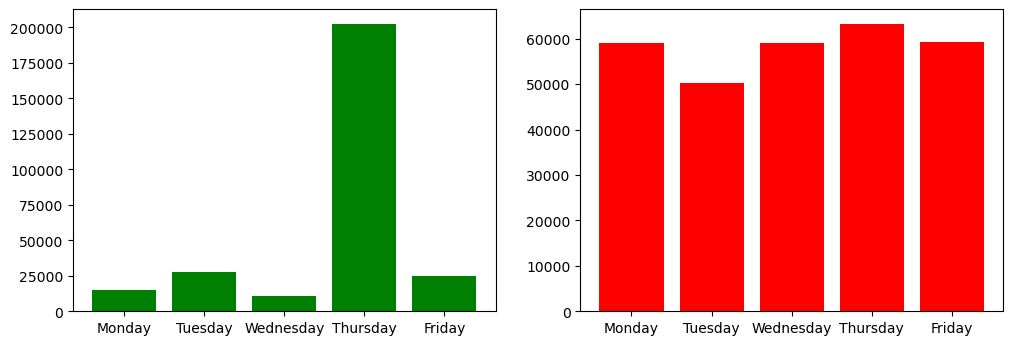

In [74]:
fig,axes=plt.subplots(figsize=(12,4),dpi=100) 
plt.subplot(1,2,1)
plt.bar(profit_data['Day'],profit_data['Profit'], label = 'Profit', color = "green")
plt.subplot(1,2,2)
plt.bar(loss_data['Day'], loss_data['Loss'], label = 'Loss', color = "red")
plt.show()

Maximum profit aswell as maximum loss is obtained on Thursday. On Monday, Tuesday, Wednesday and friday loss obtained is far greater than profit achieved, whereas on Thursday Profit is far greater than loss achieved.

In [562]:
trade_td_lessorequal_15mins['Day'] = pd.Categorical(trade_td_lessorequal_15mins['Day'], categories=days, ordered=True)
trade_td_lessorequal_15mins = trade_td_lessorequal_15mins.sort_values('Day')

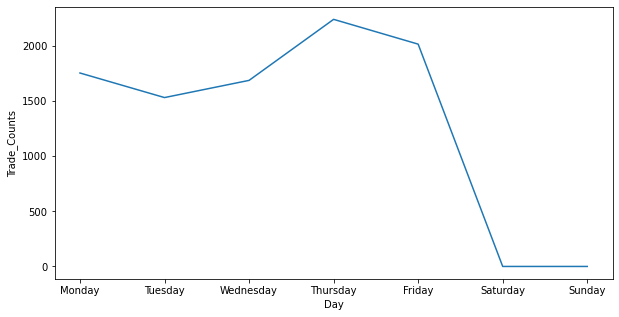

In [563]:
trade_td_lessorequal_15mins.groupby(trade_td_lessorequal_15mins['Day'])['trade_count'].sum().plot(kind='line',figsize=(10,5), xlabel='Day', ylabel='Trade_Counts')
plt.show()

Maximum number of trade counts is seen on Thursday followed by Friday.

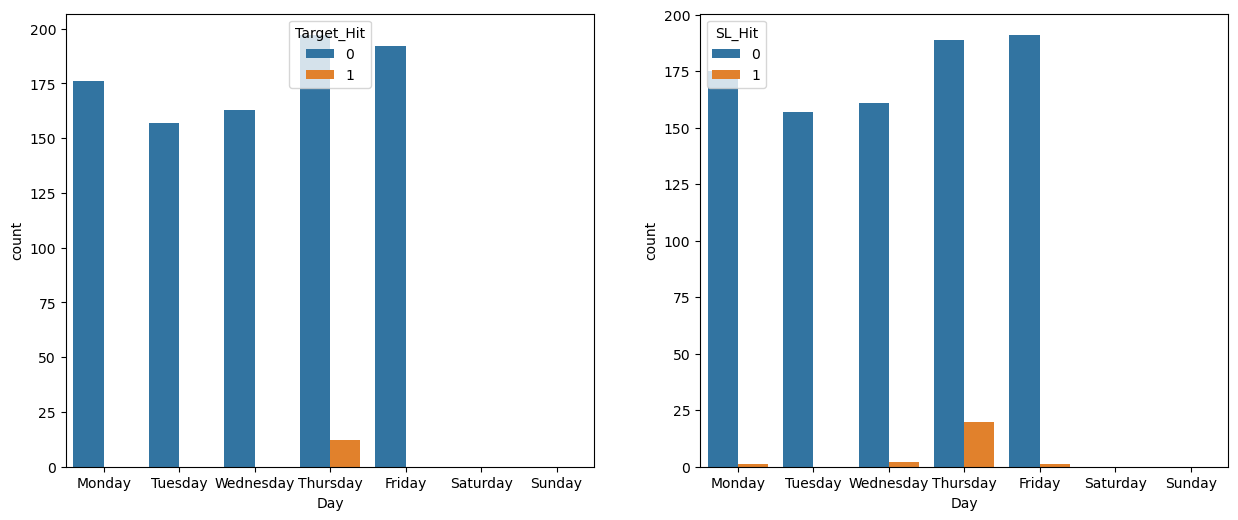

In [564]:
fig,axes=plt.subplots(figsize=(15,6),dpi=100) 
plt.subplot(1,2,1)
sns.countplot(data=trade_td_lessorequal_15mins, x="Day", hue="Target_Hit")
plt.subplot(1,2,2)
sns.countplot(data=trade_td_lessorequal_15mins, x="Day", hue="SL_Hit")
plt.show()

Maximum target hit and SL_hit is seen to happen on Thursday and Target_hit is not seen on any other day except Thursday.

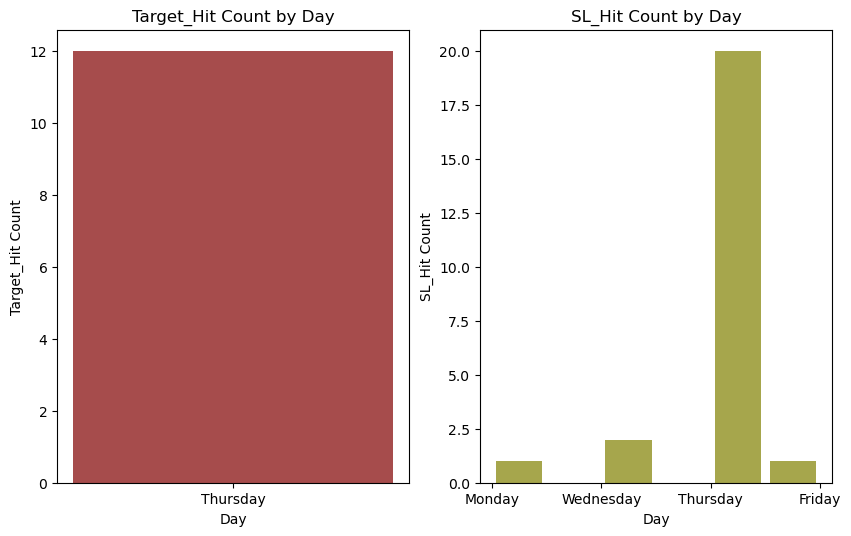

In [565]:
fig,axes=plt.subplots(figsize=(10,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Target_Hit']==1]['Day'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Day')
plt.ylabel('Target_Hit Count')
plt.title('Target_Hit Count by Day')

plt.subplot(1,2,2)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['SL_Hit']==1]['Day'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Day')
plt.ylabel('SL_Hit Count')
plt.title('SL_Hit Count by Day')
plt.show()

In [600]:
count_target_hits_on_thursday = trade_td_lessorequal_15mins.loc[(trade_td_lessorequal_15mins['Day'] == 'Thursday')& (trade_td_lessorequal_15mins['Target_Hit']==1)]['Target_Hit'].count()
print('Maximum number of {} trades has hit target on thursday'.format(count_target_hits_on_thursday))

Maximum number of 12 trades has hit target on thursday


In [601]:
count_sl_hits_on_thursday = trade_td_lessorequal_15mins.loc[(trade_td_lessorequal_15mins['Day'] == 'Thursday')& (trade_td_lessorequal_15mins['SL_Hit']==1)]['SL_Hit'].count()
print('Maximum number of {} trades has hit stock loss on thursday'.format(count_sl_hits_on_thursday))

Maximum number of 20 trades has hit stock loss on thursday


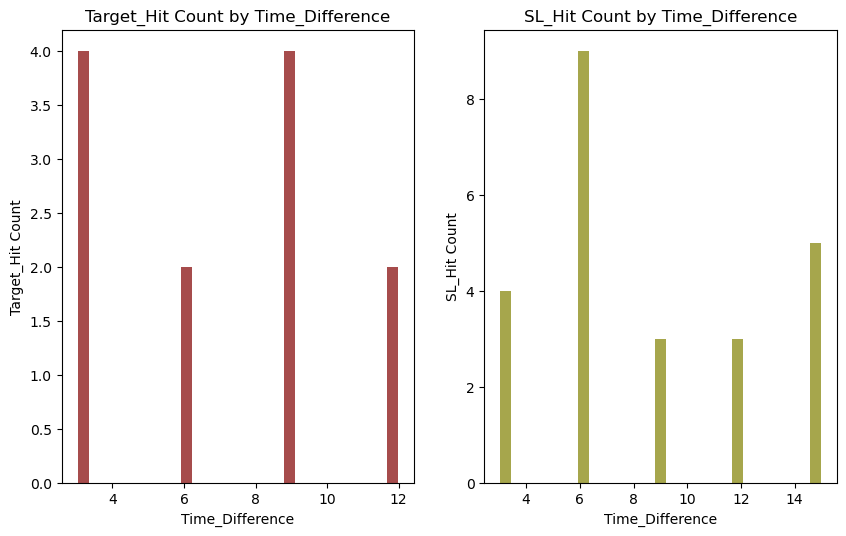

In [566]:
fig,axes=plt.subplots(figsize=(10,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Target_Hit']==1]['delta_min'], bins=25, color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Target_Hit Count')
plt.title('Target_Hit Count by Time_Difference')

plt.subplot(1,2,2)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['SL_Hit']==1]['delta_min'], bins=25, color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('SL_Hit Count')
plt.title('SL_Hit Count by Time_Difference')
plt.show()

Maximum target hit for 4 trades is obtained for time_difference 3mins and 9mins.

Maximum SL_hits of 9 trades is obtained for time_difference being 6mins.

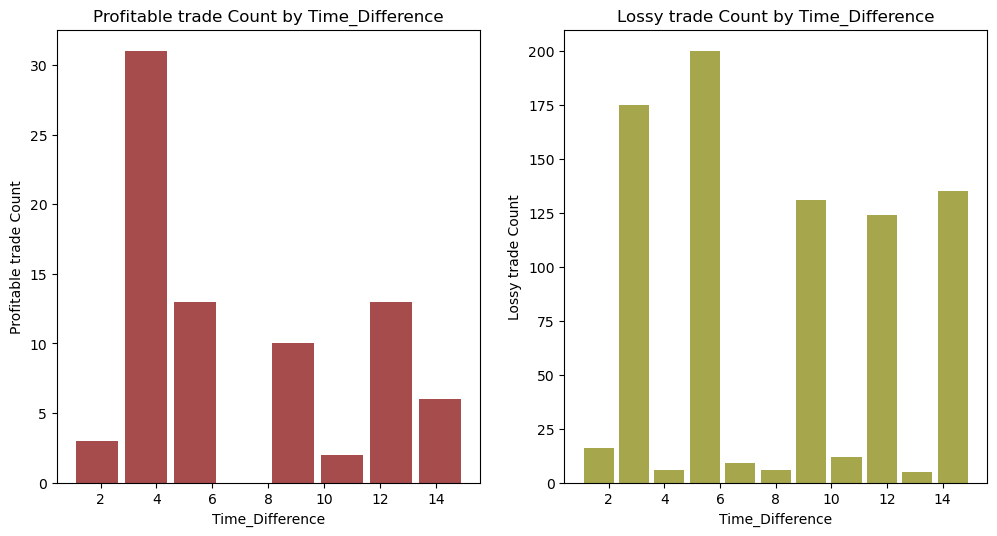

In [567]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Gain/loss']=="Gain"]['delta_min'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Profitable trade Count')
plt.title('Profitable trade Count by Time_Difference')

plt.subplot(1,2,2)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Gain/loss']=="Loss"]['delta_min'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Lossy trade Count')
plt.title('Lossy trade Count by Time_Difference')
plt.show()

Maximum number of 32 proffitable trades is seen for time_difference around 3-4mins.

Maximum number of 200+ lossy trades is seen for time_difference around 5-6mins followed by 175 lossy trades at 3mins time_difference.

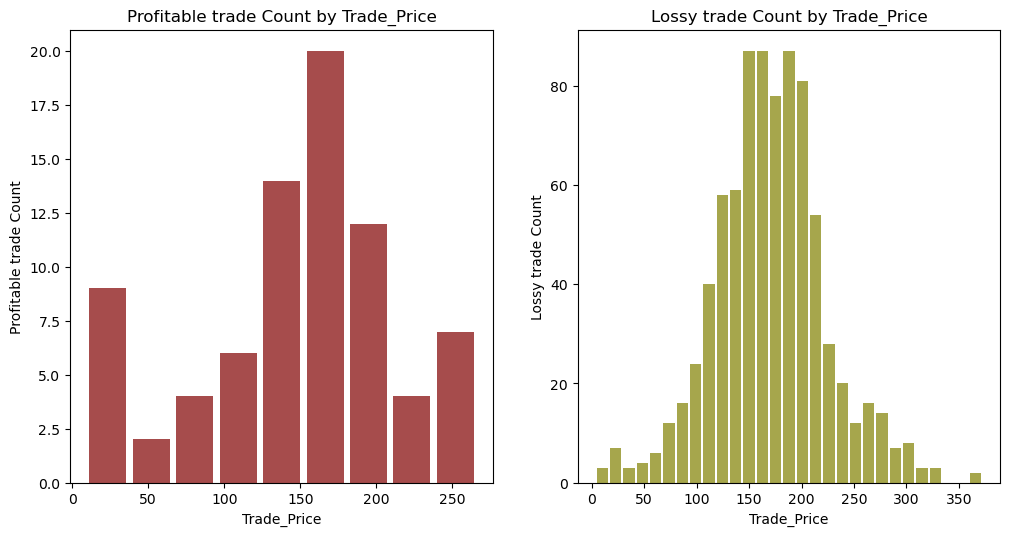

In [568]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Gain/loss']=="Gain"]['Trade_Price_Buy'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Trade_Price')
plt.ylabel('Profitable trade Count')
plt.title('Profitable trade Count by Trade_Price')

plt.subplot(1,2,2)
plt.hist(x=trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Gain/loss']=="Loss"]['Trade_Price_Buy'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Trade_Price')
plt.ylabel('Lossy trade Count')
plt.title('Lossy trade Count by Trade_Price')
plt.show()

Maximum number of 20 profittable trades is obtained for trade_price around 125-150rs.

Maximum number of 85+ lossy trades are obtained for trade_price around135-150rs, 180-190rs.

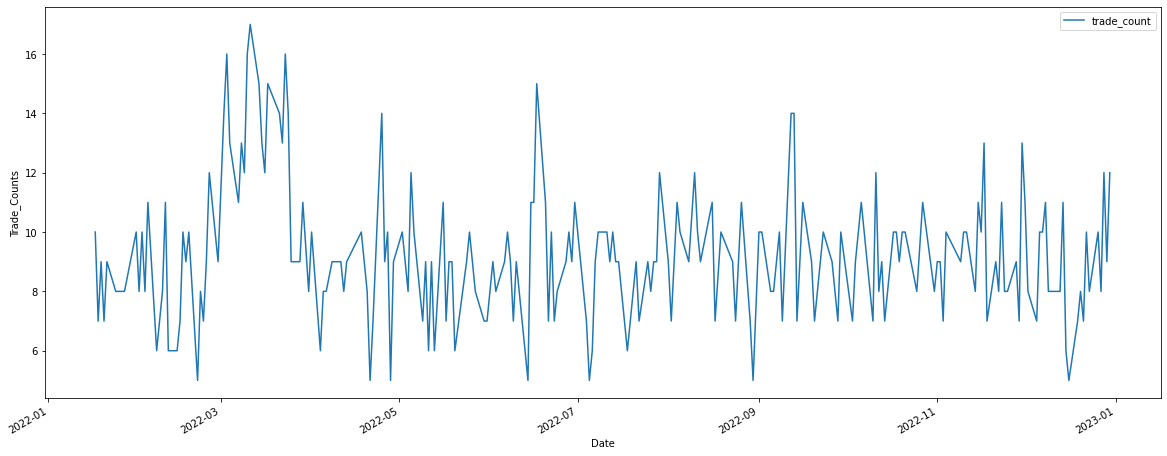

In [569]:
# Use the DataFrame's plot() method to create a line plot
trade_td_lessorequal_15mins.plot(x='Date', y='trade_count', kind='line',figsize=(20,8), xlabel='Date', ylabel='Trade_Counts')
plt.show()

In [570]:
trade_td_lessorequal_15mins['trade_count'].max()

17

In [571]:
trade_td_lessorequal_15mins.loc[trade_td_lessorequal_15mins['trade_count']==trade_td_lessorequal_15mins['trade_count'].max()].head(2)

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
164,NIFTY22M1716700CE,2022-03-11,NaN,Square-off Buy order@,198.1,-4132.0,0,0,Loss,Friday,0 days 00:02:00,202.45,2.0,2162619.0,2022-03-11 12:52:00,17
165,NIFTY22M1716700CE,2022-03-11,NaN,Square-off Buy order@,185.0,-9400.0,0,0,Loss,Friday,0 days 00:06:00,194.40,6.0,2153219.0,2022-03-11 13:37:00,17


### Median time_diff for profittable/lossy trades.

In [572]:
trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Gain/loss'] == 'Gain']['delta_min'].median()

6.0

Median time_difference for trades being profittable is 6 mins.

In [573]:
trade_td_lessorequal_15mins[trade_td_lessorequal_15mins['Gain/loss'] == 'Loss']['delta_min'].median()

8.000000000000002

Median time_difference for trades being lossy is 8 mins.

### Trades which hit Target and SL within 15mins of time_difference

In [574]:
df_th_td_within15 = trade_td_lessorequal_15mins[(trade_td_lessorequal_15mins['Target_Hit'] ==1)]
df_th_td_within15.reset_index(inplace=True, drop=True)
df_th_td_within15

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22S0117600PE,2022-09-01,NaN,Target Hit for Buy order,75.0,197690.0,1,0,Gain,Thursday,0 days 00:12:00,37.70,12.0,5264687.0,2022-09-01 11:54:00,10
1,NIFTY22M2616000CE,2022-05-26,NaN,Target Hit for Buy order,45.0,199125.0,1,0,Gain,Thursday,0 days 00:09:00,22.50,9.0,3149415.0,2022-05-26 13:00:00,9
2,NIFTY22J1615500PE,2022-06-16,NaN,Target Hit for Buy order,18.0,190960.0,1,0,Gain,Thursday,0 days 00:03:00,9.20,3.0,3573584.0,2022-06-16 11:21:00,11
3,NIFTY22J2717000CE,2022-01-27,NaN,Target Hit for Buy order,47.0,202635.0,1,0,Gain,Thursday,0 days 00:09:00,23.30,9.0,761257.0,2022-01-27 13:12:00,8
4,NIFTY22J1615500PE,2022-06-16,NaN,Target Hit for Buy order,53.0,197625.0,1,0,Gain,Thursday,0 days 00:03:00,26.65,3.0,3936262.0,2022-06-16 13:03:00,11
5,NIFTY22J1615500PE,2022-06-16,NaN,Target Hit for Buy order,29.0,195878.0,1,0,Gain,Thursday,0 days 00:12:00,14.65,12.0,3709772.0,2022-06-16 12:09:00,11
6,NIFTY22M0516800PE,2022-05-05,NaN,Target Hit for Buy order,36.0,194362.0,1,0,Gain,Thursday,0 days 00:06:00,18.25,6.0,2967833.0,2022-05-05 13:15:00,12
7,NIFTY22M0516800PE,2022-05-05,NaN,Target Hit for Buy order,28.0,196685.0,1,0,Gain,Thursday,0 days 00:06:00,14.10,6.0,2879081.0,2022-05-05 11:36:00,12
8,NIFTY22M0516800PE,2022-05-05,NaN,Target Hit for Buy order,83.0,200160.0,1,0,Gain,Thursday,0 days 00:09:00,41.30,9.0,3108698.0,2022-05-05 14:03:00,12
9,NIFTY22A0417400PE,2022-08-04,NaN,Target Hit for Buy order,121.0,199485.0,1,0,Gain,Thursday,0 days 00:03:00,60.55,3.0,4654244.0,2022-08-04 11:27:00,11


In [575]:
df_Sh_td_within15 = trade_td_lessorequal_15mins[(trade_td_lessorequal_15mins['SL_Hit'] ==1)]
df_Sh_td_within15.reset_index(inplace=True, drop=True)
df_Sh_td_within15

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2717200PE,2022-01-24,NaN,Stop Loss Triggered for Buy order,185.0,-59062.0,0,1,Loss,Monday,0 days 00:15:00,263.75,15.0,597569.0,2022-01-24 15:03:00,8
1,NIFTY22M0516800CE,2022-05-04,NaN,Stop Loss Triggered for Buy order,145.0,-58995.0,0,1,Loss,Wednesday,0 days 00:03:00,207.10,3.0,2489339.0,2022-05-04 14:05:00,8
2,NIFTY22M0516900PE,2022-05-04,NaN,Stop Loss Triggered for Buy order,80.0,-58480.0,0,1,Loss,Wednesday,0 days 00:06:00,114.40,6.0,2652811.0,2022-05-04 14:03:00,8
3,NIFTY22S0117600PE,2022-09-01,NaN,Stop Loss Triggered for Buy order,53.0,-59020.0,0,1,Loss,Thursday,0 days 00:06:00,75.70,6.0,5170220.0,2022-09-01 15:12:00,10
4,NIFTY22F1017600PE,2022-02-10,NaN,Stop Loss Triggered for Buy order,104.0,-58175.0,0,1,Loss,Thursday,0 days 00:12:00,148.75,12.0,1264080.0,2022-02-10 10:08:00,11
5,NIFTY22F2416600PE,2022-02-24,NaN,Stop Loss Triggered for Buy order,118.0,-58075.0,0,1,Loss,Thursday,0 days 00:15:00,168.50,15.0,1355359.0,2022-02-24 13:48:00,9
6,NIFTY22J0216500CE,2022-06-02,NaN,Stop Loss Triggered for Buy order,101.0,-57982.0,0,1,Loss,Thursday,0 days 00:06:00,143.95,6.0,3350122.0,2022-06-02 15:03:00,9
7,NIFTY22M2616000CE,2022-05-26,NaN,Stop Loss Triggered for Buy order,97.0,-59010.0,0,1,Loss,Thursday,0 days 00:15:00,139.15,15.0,3125280.0,2022-05-26 14:39:00,9
8,NIFTY22M2616000CE,2022-05-26,NaN,Stop Loss Triggered for Buy order,13.0,-62010.0,0,1,Loss,Thursday,0 days 00:15:00,18.85,15.0,2950290.0,2022-05-26 12:30:00,9
9,NIFTY22J1615500PE,2022-06-16,NaN,Stop Loss Triggered for Buy order,106.0,-59020.0,0,1,Loss,Thursday,0 days 00:09:00,151.40,9.0,4096812.0,2022-06-16 15:00:00,11


### Analysis on all trades with time_difference greater than 15mins.

In [576]:
trade_td_more_than_15mins = tradebook_data2[tradebook_data2['delta_min']>15]
trade_td_more_than_15mins.reset_index(inplace=True, drop=True)
trade_td_more_than_15mins.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10
2,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10
3,NIFTY22J2018400PE,2022-01-17,NaN,Square-off Buy order@,156.00,-6240.0,0,0,Loss,Monday,0 days 00:21:00,161.20,21.0,-12052.0,2022-01-17 12:39:00,10
4,NIFTY22J2018400PE,2022-01-17,NaN,Square-off Buy order@,157.15,-4200.0,0,0,Loss,Monday,0 days 00:21:00,160.65,21.0,-22432.0,2022-01-17 13:57:00,10


In [577]:
trade_td_more_than_15mins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Instr              1212 non-null   object         
 1   Date               1212 non-null   datetime64[ns] 
 2   interval           0 non-null      float64        
 3   Descr              1212 non-null   object         
 4   Trade_Price        1212 non-null   float64        
 5   Profit             1212 non-null   float64        
 6   Target_Hit         1212 non-null   int64          
 7   SL_Hit             1212 non-null   int64          
 8   Gain/loss          1212 non-null   object         
 9   Day                1212 non-null   object         
 10  delta_time         1212 non-null   timedelta64[ns]
 11  Trade_Price_Buy    1212 non-null   float64        
 12  delta_min          1212 non-null   float64        
 13  cumulative_Profit  1212 non-null   float64      

In [578]:
def max_gaining_streak(trade_td_more_than_15mins):
    current_streak = 0
    max_streak = 0
    for index, row in trade_td_more_than_15mins.iterrows():
        if row['Profit'] > 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

def max_losing_streak(trade_td_more_than_15mins):
    current_streak = 0
    max_streak = 0
    for index, row in trade_td_more_than_15mins.iterrows():
        if row['Profit'] < 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

print("Maximum gaining streak w.r.t trades is", max_gaining_streak(trade_td_more_than_15mins))  
print("Maximum loosing streak w.r.t trades is", max_losing_streak(trade_td_more_than_15mins))  


Maximum gaining streak w.r.t trades is 12
Maximum loosing streak w.r.t trades is 10


In [580]:

# Create separate dataframes for profit and loss
profit_data = trade_td_more_than_15mins[trade_td_more_than_15mins['Profit'] > 0]
profit_data["profit"] = profit_data["Profit"]
loss_data = trade_td_more_than_15mins[trade_td_more_than_15mins['Profit'] < 0]
loss_data['loss'] = abs(loss_data['Profit'])

# Group the data by day of the week and get the sum
profit_by_day = profit_data.groupby('Day')['profit'].sum()
loss_by_day = loss_data.groupby('Day')['loss'].sum()

In [581]:
profit_data['Day'] = pd.Categorical(profit_data['Day'], categories=days, ordered=True)
profit_data = profit_data.sort_values('Day')

loss_data['Day'] = pd.Categorical(loss_data['Day'], categories=days, ordered=True)
loss_data = loss_data.sort_values('Day')

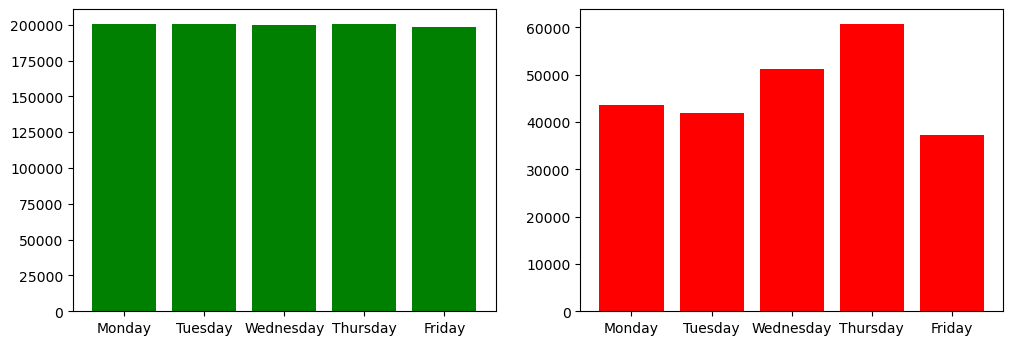

In [582]:
fig,axes=plt.subplots(figsize=(12,4),dpi=100) 
plt.subplot(1,2,1)
plt.bar(profit_data['Day'],profit_data['Profit'], label = 'Profit', color = "green")
plt.subplot(1,2,2)
plt.bar(loss_data['Day'], loss_data['loss'], label = 'Loss', color = "red")
plt.show()

For trade time_difference being greater than 15 mins, almost all days are having equal profit, whereas maximum loss is seen in thursday.

In [584]:
trade_td_more_than_15mins['Day'] = pd.Categorical(trade_td_more_than_15mins['Day'], categories=days, ordered=True)
trade_td_more_than_15mins = trade_td_more_than_15mins.sort_values('Day')

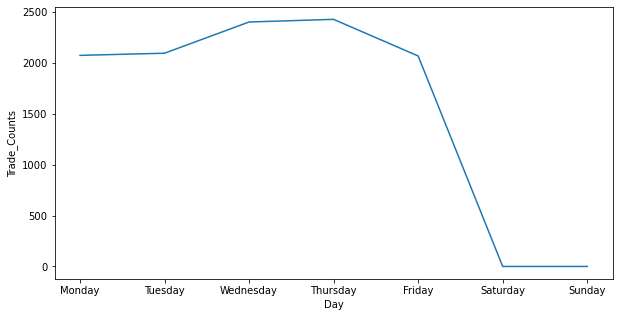

In [585]:
trade_td_more_than_15mins.groupby(trade_td_more_than_15mins['Day'])['trade_count'].sum().plot(kind='line',figsize=(10,5), xlabel='Day', ylabel='Trade_Counts')
plt.show()

Maximum numbers of trades are seen in Thursday

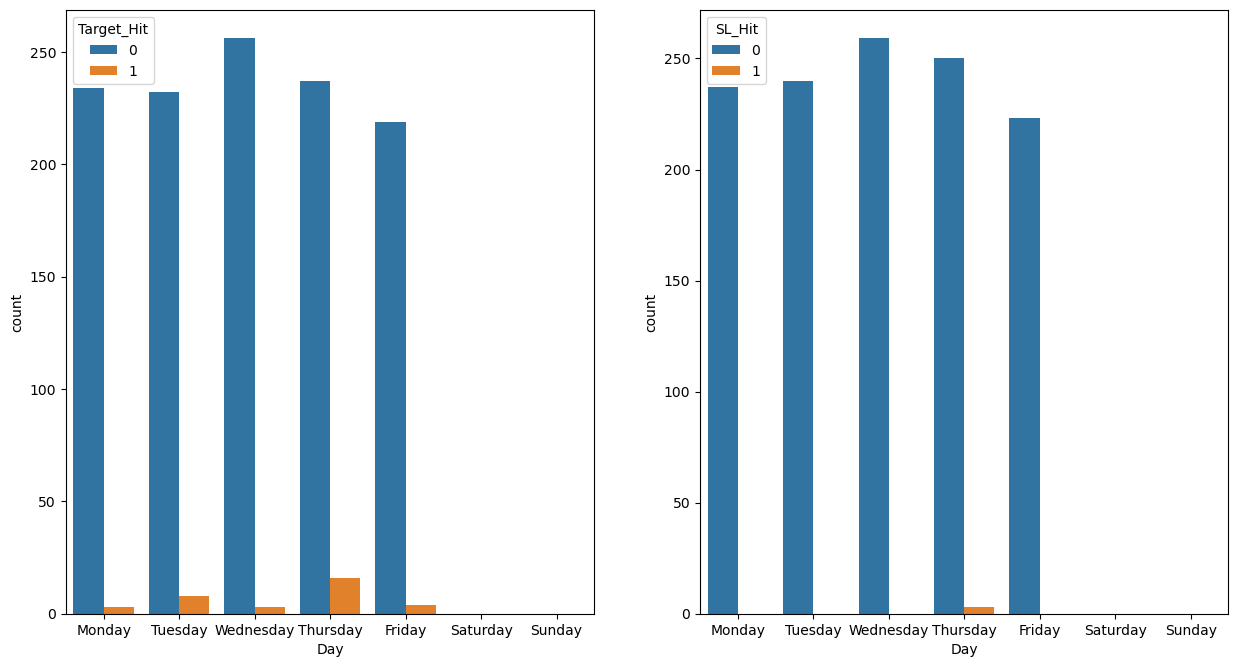

In [590]:
fig,axes=plt.subplots(figsize=(15,8),dpi=100) 
plt.subplot(1,2,1)
sns.countplot(data=trade_td_more_than_15mins, x="Day", hue="Target_Hit")
plt.subplot(1,2,2)
sns.countplot(data=trade_td_more_than_15mins, x="Day", hue="SL_Hit")
plt.show()

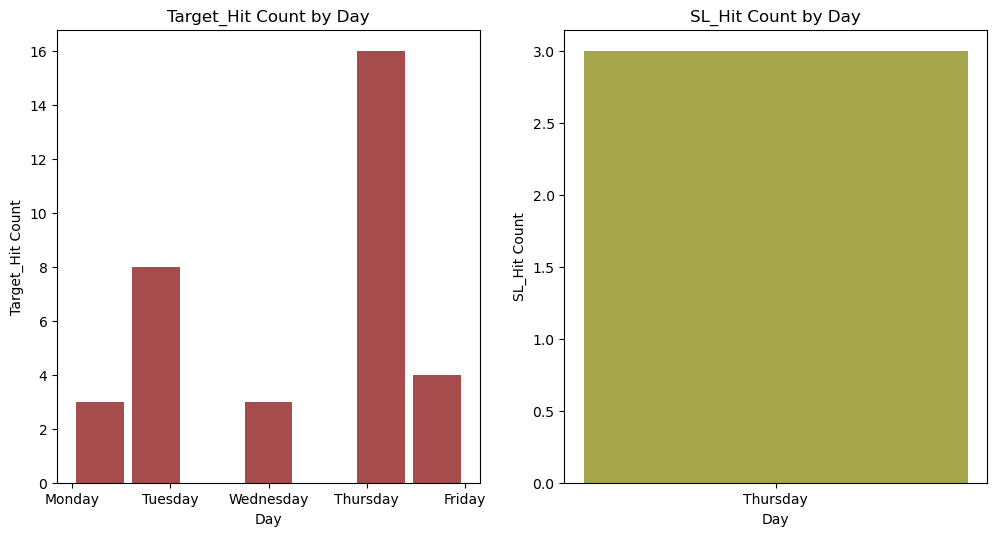

In [591]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['Target_Hit']==1]['Day'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Day')
plt.ylabel('Target_Hit Count')
plt.title('Target_Hit Count by Day')

plt.subplot(1,2,2)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['SL_Hit']==1]['Day'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Day')
plt.ylabel('SL_Hit Count')
plt.title('SL_Hit Count by Day')
plt.show()

Maximum number of trades 16 has hit target on Thursday.

Maximum number of 3 trades has hit stock loss on Thursday and there is no SL hit on other days.

In [592]:
count_target_hits_on_thursday = trade_td_more_than_15mins.loc[(trade_td_more_than_15mins['Day'] == 'Thursday')& (trade_td_more_than_15mins['Target_Hit']==1)]['Target_Hit'].count()
count_target_hits_on_thursday

16

In [595]:
count_sl_hits_on_thursday = trade_td_more_than_15mins.loc[(trade_td_more_than_15mins['Day'] == 'Thursday')& (trade_td_more_than_15mins['SL_Hit']==1)]['SL_Hit'].count()
count_sl_hits_on_thursday

3

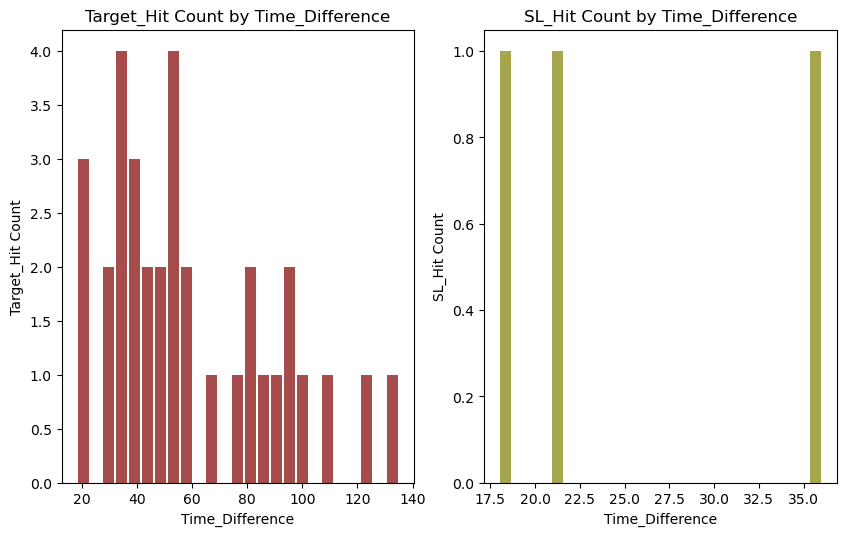

In [602]:
fig,axes=plt.subplots(figsize=(10,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['Target_Hit']==1]['delta_min'], bins=25, color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Target_Hit Count')
plt.title('Target_Hit Count by Time_Difference')

plt.subplot(1,2,2)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['SL_Hit']==1]['delta_min'], bins=25, color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('SL_Hit Count')
plt.title('SL_Hit Count by Time_Difference')
plt.show()

Maximum number of 4 trades has hit target with time difference in the range of 32-38minutes and 54-56minutes.

Maximum number of 1 trades has hit stock loss with time difference 18, 21, 36minutes.

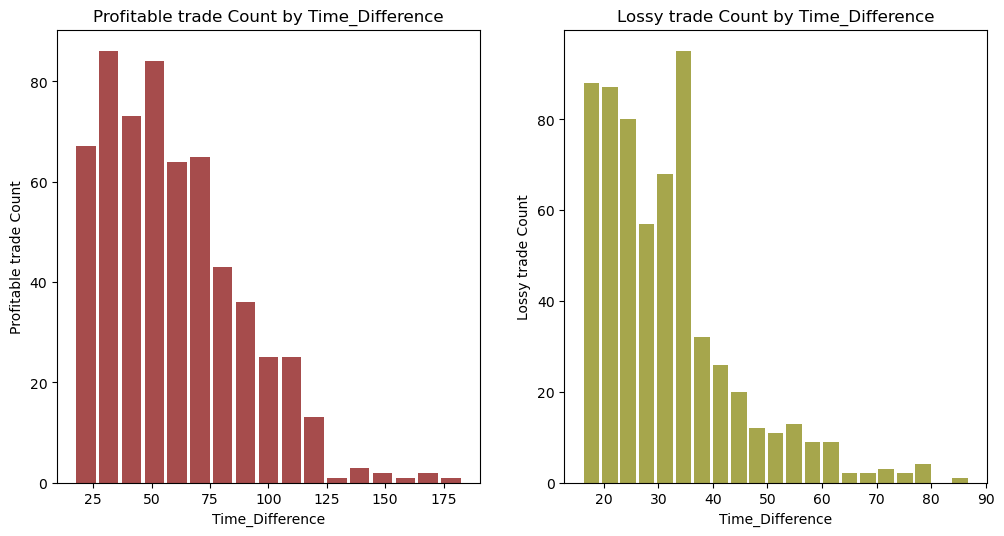

In [603]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['Gain/loss']=="Gain"]['delta_min'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Profitable trade Count')
plt.title('Profitable trade Count by Time_Difference')

plt.subplot(1,2,2)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['Gain/loss']=="Loss"]['delta_min'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Time_Difference')
plt.ylabel('Lossy trade Count')
plt.title('Lossy trade Count by Time_Difference')
plt.show()

Maximum number of profittable trades around 85 trades are of time difference in the range of 30-35minutes.

Maximum number of lossy trades around 95 trades are of time difference in the range of 34-36minutes.

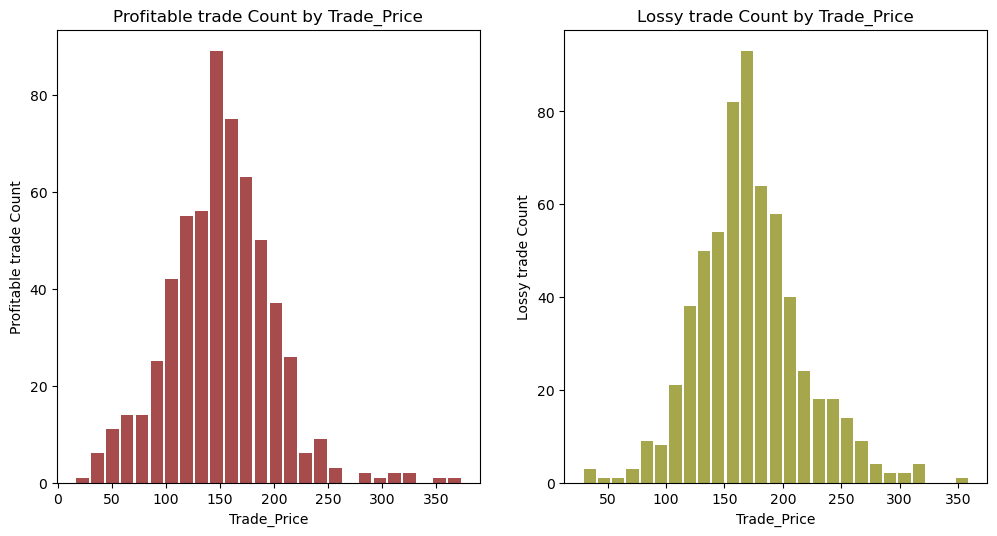

In [604]:
fig,axes=plt.subplots(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['Gain/loss']=="Gain"]['Trade_Price_Buy'], bins='auto', color='maroon', alpha=0.7, rwidth=0.85)
plt.xlabel('Trade_Price')
plt.ylabel('Profitable trade Count')
plt.title('Profitable trade Count by Trade_Price')

plt.subplot(1,2,2)
plt.hist(x=trade_td_more_than_15mins[trade_td_more_than_15mins['Gain/loss']=="Loss"]['Trade_Price_Buy'], bins='auto', color='olive', alpha=0.7, rwidth=0.85)
plt.xlabel('Trade_Price')
plt.ylabel('Lossy trade Count')
plt.title('Lossy trade Count by Trade_Price')
plt.show()

Maximum number of profittable trades around 90 trades are of trade price in the range of 145-152rs.

Maximum number of lossy trades around 90 trades are of trade price in the range of 165-170rs.

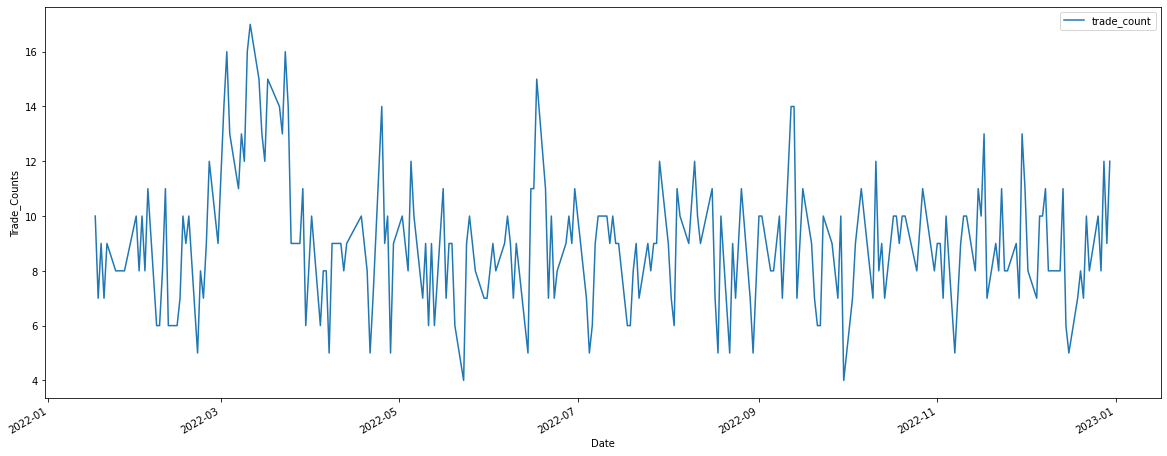

In [605]:
# Use the DataFrame's plot() method to create a line plot
trade_td_more_than_15mins.plot(x='Date', y='trade_count', kind='line',figsize=(20,8), xlabel='Date', ylabel='Trade_Counts')
plt.show()

In [607]:
trade_td_more_than_15mins[trade_td_more_than_15mins['trade_count']==trade_td_more_than_15mins['trade_count'].max()].head(1)

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
177,NIFTY22M1716700CE,2022-03-11,NaN,Square-off Buy order@,210.4,6223.0,0,0,Gain,Friday,0 days 00:36:00,203.85,36.0,2175117.0,2022-03-11 10:11:00,17


Maximum number of 17 trades has happened on  2022-03-11 do time differenec greater than 15 mins.

In [610]:
trade_df_SL_hit_after_15mins = trade_td_more_than_15mins[(trade_td_more_than_15mins['delta_min']>15) & (trade_td_more_than_15mins['SL_Hit'] ==1)]
trade_df_SL_hit_after_15mins.reset_index(inplace=True, drop=True)
trade_df_SL_hit_after_15mins

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22S2217600CE,2022-09-22,NaN,Stop Loss Triggered for Buy order,83.0,-58657.0,0,1,Loss,Thursday,0 days 00:21:00,118.55,21.0,5654282.0,2022-09-22 14:33:00,6
1,NIFTY22M0516800PE,2022-05-05,NaN,Stop Loss Triggered for Buy order,75.0,-60772.0,0,1,Loss,Thursday,0 days 00:18:00,107.85,18.0,3047926.0,2022-05-05 14:30:00,12
2,NIFTY22O2717800PE,2022-10-27,NaN,Stop Loss Triggered for Buy order,84.0,-59565.0,0,1,Loss,Thursday,0 days 00:36:00,120.10,36.0,5615527.0,2022-10-27 15:03:00,11


Only 3 trades has hit stock loss when the time difference is greater than 15 minutes.

In [611]:
trade_df_target_hit_after_15mins = trade_td_more_than_15mins[(trade_td_more_than_15mins['delta_min']>15) & (trade_td_more_than_15mins['Target_Hit'] ==1)]
trade_df_target_hit_after_15mins.reset_index(inplace=True, drop=True)
trade_df_target_hit_after_15mins

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2717200PE,2022-01-24,NaN,Target Hit for Buy order,304.0,197470.0,1,0,Gain,Monday,0 days 00:45:00,152.10,45.0,678366.0,2022-01-24 14:12:00,8
1,NIFTY22J2717200PE,2022-01-24,NaN,Target Hit for Buy order,130.0,198708.0,1,0,Gain,Monday,0 days 00:54:00,64.85,54.0,492796.0,2022-01-24 12:21:00,8
2,NIFTY22M0316800CE,2022-02-28,NaN,Target Hit for Buy order,154.0,200720.0,1,0,Gain,Monday,0 days 01:00:00,76.80,60.0,1697405.0,2022-02-28 11:32:00,9
3,NIFTY22J0715900PE,2022-07-05,NaN,Target Hit for Buy order,144.0,198275.0,1,0,Gain,Tuesday,0 days 01:39:00,71.90,99.0,4113503.0,2022-07-05 14:18:00,5
4,NIFTY22S0117600CE,2022-08-30,NaN,Target Hit for Buy order,117.0,198560.0,1,0,Gain,Tuesday,0 days 01:09:00,58.60,69.0,5020257.0,2022-08-30 12:48:00,5
5,NIFTY22S0117600CE,2022-08-30,NaN,Target Hit for Buy order,66.0,200255.0,1,0,Gain,Tuesday,0 days 01:21:00,32.90,81.0,4821697.0,2022-08-30 11:30:00,5
6,NIFTY22M1916100CE,2022-05-17,NaN,Target Hit for Buy order,126.0,199080.0,1,0,Gain,Tuesday,0 days 00:48:00,62.80,48.0,3056582.0,2022-05-17 10:48:00,7
7,NIFTY22F2417000CE,2022-02-22,NaN,Target Hit for Buy order,217.0,195300.0,1,0,Gain,Tuesday,0 days 00:36:00,108.50,36.0,1687559.0,2022-02-22 14:27:00,8
8,NIFTY22F1717200CE,2022-02-15,NaN,Target Hit for Buy order,235.0,199665.0,1,0,Gain,Tuesday,0 days 01:33:00,117.55,93.0,1652482.0,2022-02-15 15:17:00,7
9,NIFTY22F1717200CE,2022-02-15,NaN,Target Hit for Buy order,62.0,197440.0,1,0,Gain,Tuesday,0 days 00:48:00,31.15,48.0,1440855.0,2022-02-15 11:50:00,7


34 trades has hit target when the time difference is greater than 15 minutes.

In [612]:
trade_td_more_than_15mins[trade_td_more_than_15mins['Gain/loss'] == 'Gain']['delta_min'].median()

54.0

For all profittable trades with time difference greater than 15mins median time difference is 54mins.

In [614]:
trade_td_more_than_15mins[trade_td_more_than_15mins['Gain/loss'] == 'Loss']['delta_min'].median()

28.0

For all lossy trades with time difference greater than 15mins median time difference is 28mins.

In [619]:
tradebook_data2.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10


### Creating a new dataframe with trade_buy_price ranges in rows and tehir respective trade counts, lossy trade counts, profittable trade counts, percentage of profittable and lossy trades in columns.

In [78]:
tradebook_df = tradebook_data2.copy()

In [79]:
tb=tradebook_data2.copy()

In [84]:
tb

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,148.90,17473.0,0,0,Gain,Friday,0 days 01:45:00,136.85,105.0,5393577.0,2022-12-30 12:37:00,12
2105,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,152.90,-14100.0,0,0,Loss,Friday,0 days 00:27:00,164.65,27.0,5379477.0,2022-12-30 13:31:00,12
2106,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,158.30,-23980.0,0,0,Loss,Friday,0 days 00:24:00,180.10,24.0,5355497.0,2022-12-30 14:16:00,12
2107,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,159.30,-18040.0,0,0,Loss,Friday,0 days 00:12:00,175.70,12.0,5337457.0,2022-12-30 14:49:00,12


In [95]:
tb.assign(tb_new=lambda x:np.where(x['Trade_Price_Buy']<=50,'<=50',
                                   np.where(x['Trade_Price_Buy']<=200,'<=200',np.where(x['Trade_Price_Buy']>=200,">=200"))))

ValueError: either both or neither of x and y should be given

In [89]:
tradebook_df = tradebook_df.assign(Trade_buy_price_range=lambda x: np.where(x['Trade_Price_Buy'] <= 50, '<=50', np.where(x['Trade_Price_Buy'] <=75, '<=75', 
                                                np.where(x['Trade_Price_Buy'] <=100, '<=100', np.where(x['Trade_Price_Buy'] <=150, '<=150',np.where(x['Trade_Price_Buy'] <=250, '<=250', 
                                                np.where(x['Trade_Price_Buy'] >=250, '>=250', np.where(x['Trade_Price_Buy'] >=300, '>=300','>=350'))))))))

In [692]:
tradebook_df.head()

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count,Trade_buy_price_range
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10,<=250
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10,<=250
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10,<=250
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10,<=250
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10,<=250


In [693]:
print(tradebook_df.columns)

Index(['Instr', 'Date', 'interval', 'Descr', 'Trade_Price', 'Profit',
       'Target_Hit', 'SL_Hit', 'Gain/loss', 'Day', 'delta_time',
       'Trade_Price_Buy', 'delta_min', 'cumulative_Profit', 'Date_time',
       'trade_count', 'Trade_buy_price_range'],
      dtype='object')


In [87]:
tradebook_df['trade_counts'] = 1

In [91]:
tradebook_df

,Instr,Date,interval,Descr,Trade_Price,Profit,Target_Hit,SL_Hit,Gain/loss,Day,delta_time,Trade_Price_Buy,delta_min,cumulative_Profit,Date_time,trade_count,gain_trade_counts,loss_trade_counts,trade_counts,Trade_buy_price_range
0,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,161.75,840.0,0,0,Gain,Monday,0 days 01:24:00,161.05,84.0,840.0,2022-01-17 11:33:00,10,True,False,1,<=250
1,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,164.70,-7073.0,0,0,Loss,Monday,0 days 00:24:00,170.85,24.0,-6233.0,2022-01-17 12:18:00,10,False,True,1,<=250
2,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,167.00,-3277.0,0,0,Loss,Monday,0 days 00:12:00,169.85,12.0,-9510.0,2022-01-17 12:51:00,10,False,True,1,<=250
3,NIFTY22J2018200CE,2022-01-17,NaN,Square-off Buy order@,168.05,403.0,0,0,Gain,Monday,0 days 00:12:00,167.70,12.0,-9107.0,2022-01-17 13:24:00,10,True,False,1,<=250
4,NIFTY22J2018200CE,2022-01-17,NaN,Day Square-off Buy order,179.35,10067.0,0,0,Gain,Monday,0 days 01:27:00,169.90,87.0,960.0,2022-01-17 15:27:00,10,True,False,1,<=250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,148.90,17473.0,0,0,Gain,Friday,0 days 01:45:00,136.85,105.0,5393577.0,2022-12-30 12:37:00,12,True,False,1,<=150
2105,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,152.90,-14100.0,0,0,Loss,Friday,0 days 00:27:00,164.65,27.0,5379477.0,2022-12-30 13:31:00,12,False,True,1,<=250
2106,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,158.30,-23980.0,0,0,Loss,Friday,0 days 00:24:00,180.10,24.0,5355497.0,2022-12-30 14:16:00,12,False,True,1,<=250
2107,NIFTY22J0518300PE,2022-12-30,NaN,Square-off Buy order@,159.30,-18040.0,0,0,Loss,Friday,0 days 00:12:00,175.70,12.0,5337457.0,2022-12-30 14:49:00,12,False,True,1,<=250


In [92]:
tradebook_df['gain_trade_counts'] = tradebook_df['Gain/loss'] == 'Gain'
tradebook_df['loss_trade_counts'] = tradebook_df['Gain/loss'] == 'Loss'

new_df = tradebook_df.pivot_table(values=['trade_counts','gain_trade_counts','loss_trade_counts'], index='Trade_buy_price_range', aggfunc='sum')

In [701]:
pd.DataFrame(new_df)
new_df.reset_index(inplace=True)

In [93]:
new_df

,gain_trade_counts,loss_trade_counts,trade_counts
Trade_buy_price_range,,,
<=100,45,51,96
<=150,237,379,616
<=250,326,883,1209
<=50,19,19,38
<=75,28,15,43
>=250,14,93,107


In [703]:
new_df['%_of_profittable_trades'] = round((new_df['gain_trade_counts'] / new_df['trade_counts'])*100,2)
new_df['%_of_lossy_trades'] = round((new_df['loss_trade_counts'] / new_df['trade_counts'])*100,2)
new_df

,Trade_buy_price_range,gain_trade_counts,loss_trade_counts,trade_counts,%_of_profittable_trades,%_of_lossy_trades
0,<=100,45,51,96,46.88,53.12
1,<=150,237,379,616,38.47,61.53
2,<=250,326,883,1209,26.96,73.04
3,<=50,19,19,38,50.00,50.00
4,<=75,28,15,43,65.12,34.88
5,>=250,14,93,107,13.08,86.92


In [699]:
tradebook_df = tradebook_df.drop(columns=['gain_counts', 'loss_counts'])